# Final Project - Investigating Jupiter's Magnetic Field
## Emma Conrad - CLaSP 405
### 26 April 2019
In this project, I will be modeling Jupiter's magnetic field using the theoretical dipole equation, and then comparing that to actual magnetic field measurments from the Juno spacecraft that is in orbit around Jupiter now.

## Step 1: Datasets and Hypothesis
I will be analyzing magnetic field data from Jupiter, thanks to the Juno spacecraft currently orbiting the gas giant. I will be looking at Perijove 9, or the point in the orbit where a satellite around Jupiter is closest to the planet's center - which corresponds to October 24, 2017. This is Day of Year (DOY) 297. This has data on the spacecraft position (in Planetocentric coordinates) and the magnetic field components from the Flux Gate Magnetometer (FGM). The data is from NASA Planetary Data System (PDS) / Planetary Plasma Interactions (PPI).

DOY 296 can be accessed here: https://pds-ppi.igpp.ucla.edu/search/view/?f=yes&id=pds://PPI/JNO-J-3-FGM-CAL-V1.0/DATA/JUPITER/PC/PERI-09/fgm_jno_l3_2017296pc_r1s_v01&o=1

DOY 298 can be accessed here: https://pds-ppi.igpp.ucla.edu/search/view/?f=yes&id=pds://PPI/JNO-J-3-FGM-CAL-V1.0/DATA/JUPITER/PC/PERI-09/fgm_jno_l3_2017298pc_r1s_v01&o=1

Data for DOY 297 is not availabe.

I also have an image taken by the Junocam on October 24, 2017 at 18:11 UT. That can be accessed here: https://www.missionjuno.swri.edu/junocam/processing?id=3100
### Hypothesis
My hypothesis is that Jupiter has a perfect dipole magnetic field. I will use the equation for the total magnitude of the dipole field as my model for this project. That equation depends on the distance from Jupiter and geomagnetic latitude.

My cause dataset is the spacecraft position. My effect dataset is the magnetic field magnitude. According to my hypothesis, as the spacecraft moves closer to Jupiter, the total magnitude of the magnetic field will increase.

#### Definition of the Planetocentric coordinate system
The planetocentric (pc) coordinate system is body-fixed and rotates with the body as it spins on its axis.
The body rotation axis is the primary vector used to define this coordinate system. Z is taken to lie along
the rotation axis and be positive in the direction of positive angular momentum. The X-axis is defined to
lie in the equatorial plane of the body, perpendicular to Z, and in the direction of the prime meridian as
defined by the IAU. The Y axis completes the right-handed set.

From the Juno documentation: https://pds-ppi.igpp.ucla.edu/search/view/?f=yes&id=pds://PPI/JNO-J-3-FGM-CAL-V1.0/DOCUMENT/VOLSIS&o=1

For the purposes of this project, the direction that the X and Y axis point in is not important. The main take-away from this is that the XY plane lies in Jupiter's equatorial plane, and it rotates with the rotation of Jupiter.

## Step 2: Read in the data

In [1]:
# import required packages for this project

import numpy as np                              #for accuracy 
import matplotlib.pyplot as plt                 #for pretty plotting
import pandas as pd                             #for data structures
import datetime as dt                           #Importing the package datetime for 
                                                #datetime manipulation
from   scipy import stats                       #for linear regression
import matplotlib.dates as mdt                  #for manipulation of dates in matplotlib
from   matplotlib.ticker import MultipleLocator #for pretty plotting
import importlib                                #for reimporting libaries / package
import linerror as lr                           #written by T.A. Azari - for calculating linear
                                                #fits
import externalfunctions as extfunc             #written by T.A. Azari - this will read in the
                                                #FGM Juno data, read image files, convert 
                                                #to Jupiter radii, and add 3 components in quadrature
                                                #edited by Emma Conrad
from   matplotlib.patches import Rectangle      #for plotting rectangles
from   mpl_toolkits.mplot3d import Axes3D       #for 3D plotting

# import skew, kurtosis, norm, and chisquare from scipy stats for more in-depth analysis
from scipy.stats import skew, kurtosis, norm, chisquare 

from   sklearn.metrics import confusion_matrix  #for confusion matrix with event prediciton

# tell Jupyter to plot inline in the notebook
%matplotlib inline

In [2]:
# show the help menu on extfunc
help(extfunc)

Help on module externalfunctions:

NAME
    externalfunctions - externalfunctions.py

DESCRIPTION
    Comment Block for external modules should have: 
    
    Name and Date: 
    - Written on 1/29/2018 for CLaSP 405 by Lab TA A. Azari. 
    
    Purpose:
    - To create a module with helpful reading file functions and 
    magnetic field data analysis for Lab 4.

FUNCTIONS
    addQuadrature(X, Y, Z)
        Calculates a quadrature sum of three values. 
        Formula as np.sqrt(x^2 + y^2 + z^2)
        Useful when calculating the  magnitude of X, Y, Z vector components. 
        
        Inputs:
        - X, array or single value (numpy etc).
        - Y, array or single value (numpy etc).
        - Z, array or single value (numpy etc).
        
        Outputs:
        - magnitude, array or single value (numpy etc) of magnitude of components.
    
    convertJupiterR(columns)
        Takes in a dataframe subset and converts
        into radii of Jupiter by creating new columns.
    

In [3]:
# set variables for the first day I want to read in
yearVal = '2017'
doyVal = '296'

# read in the data for DOY 296
mag296 = extfunc.readFGM(yearVal, doyVal)

# print the head of the file to make sure it looks okay
mag296.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2017-10-23 00:00:00,2017 296 0 0 0,666,20.76,5.09,0.69,1940319.855,831089.460,293828.488
2017-10-23 00:00:01,2017 296 0 0 1,478,20.73,5.10,0.71,1940431.649,830809.135,293829.098
2017-10-23 00:00:02,2017 296 0 0 2,478,20.77,5.13,0.73,1940569.187,830464.101,293829.848
2017-10-23 00:00:03,2017 296 0 0 3,478,20.82,5.21,0.69,1940706.665,830119.043,293830.599
2017-10-23 00:00:04,2017 296 0 0 4,478,20.84,5.28,0.64,1940844.081,829773.963,293831.349
2017-10-23 00:00:05,2017 296 0 0 5,478,20.87,5.32,0.65,1940981.435,829428.860,293832.100
2017-10-23 00:00:06,2017 296 0 0 6,478,20.88,5.29,0.63,1941118.729,829083.734,293832.850
2017-10-23 00:00:07,2017 296 0 0 7,478,20.91,5.28,0.67,1941255.961,828738.586,293833.600
2017-10-23 00:00:08,2017 296 0 0 8,478,20.93,5.26,0.75,1941393.131,828393.415,293834.351


In [4]:
# DOY 296 looks good! onto the next day...

# now read in the other day I have, yearVal is still 2017
doyVal = '298'

# read in DOY 298
mag298 = extfunc.readFGM(yearVal, doyVal)

# print the head of the file to make sure it looks okay
mag298.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2017-10-25 00:00:00,2017 298 0 0 0,576,47.71,-1084.64,664.82,16793.047,362053.354,-461055.233
2017-10-25 00:00:01,2017 298 0 0 1,513,47.99,-1084.73,664.68,16854.196,362066.729,-461064.689
2017-10-25 00:00:02,2017 298 0 0 2,513,48.26,-1084.77,664.63,16919.427,362080.984,-461074.774
2017-10-25 00:00:03,2017 298 0 0 3,513,48.35,-1084.77,664.56,16984.663,362095.228,-461084.860
2017-10-25 00:00:04,2017 298 0 0 4,513,48.48,-1084.74,664.60,17049.904,362109.459,-461094.945
2017-10-25 00:00:05,2017 298 0 0 5,513,48.42,-1084.65,664.68,17115.151,362123.679,-461105.030
2017-10-25 00:00:06,2017 298 0 0 6,513,48.25,-1084.50,664.72,17180.404,362137.886,-461115.115
2017-10-25 00:00:07,2017 298 0 0 7,513,47.95,-1084.30,664.82,17245.662,362152.082,-461125.199
2017-10-25 00:00:08,2017 298 0 0 8,513,47.51,-1084.09,664.87,17310.926,362166.265,-461135.283


In [5]:
# DOY 298 looks good too

# now, I want to read in my image files (this can also be done with extfunc)
# set the time the image was taken
# 10/24/2017 at 18:11 UT
imgTime = dt.datetime(2017, 10, 24, 18, 11)

# set directory name where the image file is kept
directoryName = './Data/ImageSet3100/'

# read image data
imageData = extfunc.readImgFiles(directoryName)

# I won't use this image until Step 3F, where I will create an additional figure
# I'll manipulate the image of Jupiter like we did for Lab 3

## Step 3: Explore the data
### Step 3A: Resample the data
I know that there is a day misssing, but there's probably a couple missing data points in the two days that I do have.

In [6]:
# check the lengths of each dataset
print('Length of mag 296 = ', len(mag296))
print('Length of mag 298 = ', len(mag298))
print('The size 24x60x60 = ', 24*60*60)

Length of mag 296 =  86400
Length of mag 298 =  85790
The size 24x60x60 =  86400


In [7]:
# append the two datasets together before resampling

dataFGM = mag296.append(mag298)

print(dataFGM)

                              DATETIME  MSEC    B_X    B_Y    B_Z  \
DATETIME                                                            
2017-10-23 00:00:00     2017 296 0 0 0   666  20.76   5.09   0.69   
2017-10-23 00:00:01     2017 296 0 0 1   478  20.73   5.10   0.71   
2017-10-23 00:00:02     2017 296 0 0 2   478  20.77   5.13   0.73   
2017-10-23 00:00:03     2017 296 0 0 3   478  20.82   5.21   0.69   
2017-10-23 00:00:04     2017 296 0 0 4   478  20.84   5.28   0.64   
2017-10-23 00:00:05     2017 296 0 0 5   478  20.87   5.32   0.65   
2017-10-23 00:00:06     2017 296 0 0 6   478  20.88   5.29   0.63   
2017-10-23 00:00:07     2017 296 0 0 7   478  20.91   5.28   0.67   
2017-10-23 00:00:08     2017 296 0 0 8   478  20.93   5.26   0.75   
2017-10-23 00:00:09     2017 296 0 0 9   478  20.95   5.22   0.67   
2017-10-23 00:00:10    2017 296 0 0 10   478  20.98   5.18   0.63   
2017-10-23 00:00:11    2017 296 0 0 11   478  20.99   5.22   0.60   
2017-10-23 00:00:12    2017 296 0 

In [8]:
# first, I'll convert the X, Y, and Z positions into Jupiter radii so they are more intuitive
# pass in columns to convert
convertedCols = extfunc.convertJupiterR(dataFGM[['POS_X', 'POS_Y', 'POS_Z']])

# create and assign new columns here - 
dataFGM[['POS_X_RJ', 'POS_Y_RJ', 'POS_Z_RJ']] = convertedCols

# take a look 
print(dataFGM[['POS_X_RJ', 'POS_X', 'POS_Y_RJ', 'POS_Y', 'POS_Z_RJ', 'POS_Z']].head(n=10))

                      POS_X_RJ        POS_X   POS_Y_RJ       POS_Y  POS_Z_RJ  \
DATETIME                                                                       
2017-10-23 00:00:00  27.140377  1940319.855  11.624930  831089.460  4.109949   
2017-10-23 00:00:01  27.141941  1940431.649  11.621008  830809.135  4.109958   
2017-10-23 00:00:02  27.143865  1940569.187  11.616182  830464.101  4.109968   
2017-10-23 00:00:03  27.145788  1940706.665  11.611356  830119.043  4.109979   
2017-10-23 00:00:04  27.147710  1940844.081  11.606529  829773.963  4.109989   
2017-10-23 00:00:05  27.149631  1940981.435  11.601702  829428.860  4.110000   
2017-10-23 00:00:06  27.151552  1941118.729  11.596874  829083.734  4.110010   
2017-10-23 00:00:07  27.153471  1941255.961  11.592046  828738.586  4.110021   
2017-10-23 00:00:08  27.155390  1941393.131  11.587218  828393.415  4.110031   
2017-10-23 00:00:09  27.157308  1941530.240  11.582390  828048.222  4.110042   

                          POS_Z  
DATET

In [9]:
# this command resamples our array at the 1S frequency ie it adds in values where there are 
# missing values and fills with NAN
oneSecDataFGM = (dataFGM.resample('1S').asfreq())

# now check the lengths again
print(len(oneSecDataFGM), (24*3*60*60), len(dataFGM))

259199 259200 172190


In [10]:
# there's one value missing because the dataset ends at 23:59:58
# on the 25th, instead of ending at 23:59:59

# do a check for the NaNs where I know there is missing data

# should be data here
print(oneSecDataFGM.loc[dt.datetime(2017, 10, 23, 1), :])
# should be no data here
print(oneSecDataFGM.loc[dt.datetime(2017, 10, 24, 1), :])

DATETIME    2017 296 1 0 0
MSEC                   474
B_X                  -3.16
B_Y                   1.69
B_Z                  -3.67
POS_X          2.02301e+06
POS_Y              -470638
POS_Z               296504
POS_X_RJ            28.297
POS_Y_RJ          -6.58309
POS_Z_RJ           4.14738
Name: 2017-10-23 01:00:00, dtype: object
DATETIME    NaN
MSEC        NaN
B_X         NaN
B_Y         NaN
B_Z         NaN
POS_X       NaN
POS_Y       NaN
POS_Z       NaN
POS_X_RJ    NaN
POS_Y_RJ    NaN
POS_Z_RJ    NaN
Name: 2017-10-24 01:00:00, dtype: object


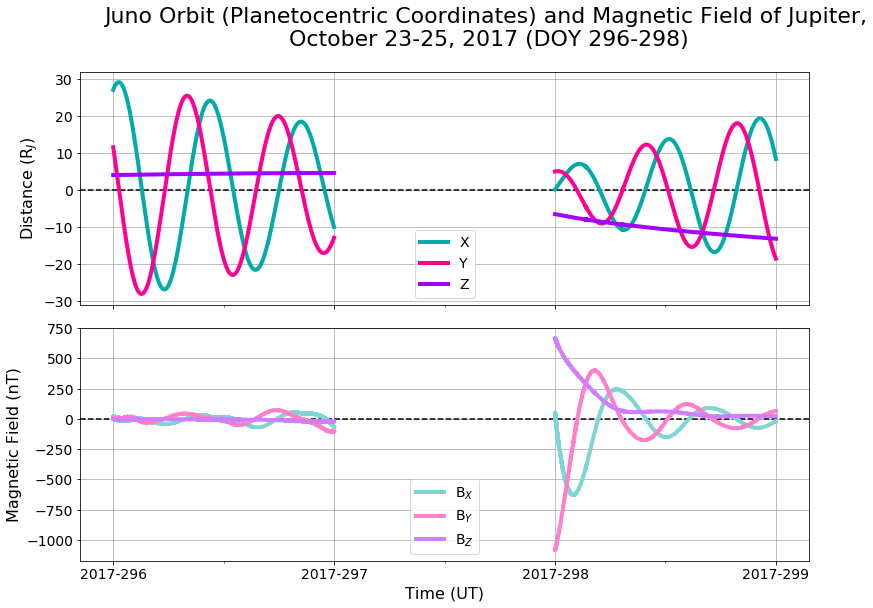

In [11]:
# plot a first look at the data
# X, Y, Z position on one subplot
# magnetic field Bx, By, and Bz components on another subplot

# set up the figure 
fig = plt.figure(figsize=(15, 9))
fig.suptitle('Juno Orbit (Planetocentric Coordinates) and Magnetic Field of Jupiter,\n October 23-25, 2017 (DOY 296-298)',
             fontsize=22)

# set up the grid spec for the two subplots
gs = plt.GridSpec(2, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])

# plot the Juno position X, Y, and Z components
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_X_RJ'], linewidth=4.0, 
         color = '#00aba9', label = 'X', zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Y_RJ'], linewidth=4.0, 
         color = '#ff0097', label = 'Y', zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Z_RJ'], linewidth=4.0, 
         color = '#a200ff', label = 'Z', zorder=20)

# set up horizontal line, y-label, and title for subplot 1
ax1.axhline(y=0.0, color = 'k', linestyle = '--', zorder=10)
ax1.set_ylabel('Distance (R$_{J}$)', fontsize = 16)

ax1.tick_params(labelsize = 14)
#set up the grid
ax1.grid()
ax1.set_xticklabels([])

ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

ax2.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax2.xaxis.set_major_locator(mdt.DayLocator())
#SET FORMAT
ax2.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax2.set_xlabel('Time (UT)', fontsize = 18)
ax2.tick_params(labelsize = 14)

#set up the grid
ax2.grid()

# plot the magnetic field components
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_X'], linewidth=4.0, 
         color = '#7fd5d4', label = 'B$_{X}$', zorder=20)
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Y'], linewidth=4.0, 
         color = '#ff7fcb', label = 'B$_{Y}$', zorder=20)
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Z'], linewidth=4.0, 
         color = '#d07fff', label = 'B$_{Z}$', zorder=20)

ax2.axhline(y=0.0, color = 'k', linestyle = '--', zorder=10)
ax2.set_ylabel('Magnetic Field (nT)', fontsize = 16)
ax2.set_xlabel('Time (UT)', fontsize = 16)

ax1.legend(loc='lower center', prop={'size':14})
ax2.legend(loc='lower center', prop={'size':14})

# save figure to figures folder
plt.savefig('./Figures/OrbitAndMagneticField.png', dpi=300)

### Step 3B: Determine the distribution of the datasets

In [12]:
# create a nan mask
nanMask = ((~np.isnan(oneSecDataFGM['B_X'])) &
          (~np.isnan(oneSecDataFGM['B_Y'])) &
          (~np.isnan(oneSecDataFGM['B_X'])) &
          (~np.isnan(oneSecDataFGM['POS_X_RJ'])) &
          (~np.isnan(oneSecDataFGM['POS_Y_RJ'])) &
          (~np.isnan(oneSecDataFGM['POS_Z_RJ'])))

In [13]:
# check the length of the masked dataset
len(oneSecDataFGM[nanMask])

172190

The number of bins for the histogram is: 415.0


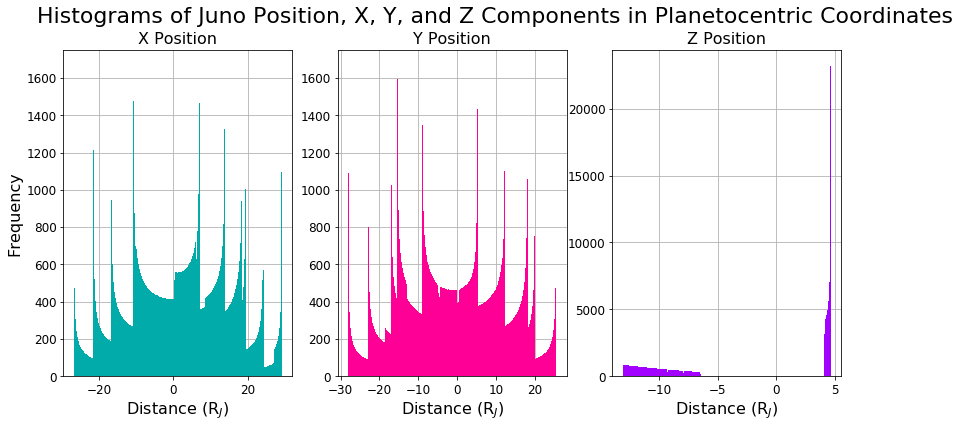

In [14]:
# plot histograms of the position data first

# set up the figure 
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Histograms of Juno Position, X, Y, and Z Components in Planetocentric Coordinates', fontsize=22)

# set up the grid spec for the three subplots
gs = plt.GridSpec(1, 3, hspace=0.2, wspace=0.2, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

# number of bins for the histogram is square root of the sample size
# use the resampled dataset but with the nanMask so it doesn't count
# the length including the nan's
sampleSize = len(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'])
# np.ceil rounds up
numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

# plot the histograms using the nanMask
ax1.hist(oneSecDataFGM.loc[nanMask,'POS_X_RJ'], bins = int(numBins), 
         facecolor = '#00aba9', zorder=10)
ax1.set_title('X Position', fontsize=16)
ax1.set_xlabel('Distance (R$_{J}$)', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16)
ax1.tick_params(labelsize = 12)
ax1.set_ylim([0, 1750])

ax2.hist(oneSecDataFGM.loc[nanMask,'POS_Y_RJ'], bins = int(numBins), 
         facecolor = '#ff0097', zorder=10)
ax2.set_title('Y Position', fontsize=16)
ax2.set_xlabel('Distance (R$_{J}$)', fontsize=16)
ax2.tick_params(labelsize = 12)
ax2.set_ylim([0, 1750])

ax3.hist(oneSecDataFGM.loc[nanMask,'POS_Z_RJ'], bins = int(numBins), 
         facecolor = '#a200ff', zorder=10)
ax3.set_title('Z Position', fontsize=16)
ax3.set_xlabel('Distance (R$_{J}$)', fontsize=16)
ax3.tick_params(labelsize = 12)

#set up the grid
ax1.grid()
ax2.grid()
ax3.grid()

# save figure to figures folder
plt.savefig('./Figures/PositionHistograms.png', dpi=300)

In [15]:
# these are kind of weird looking, but the statistics might say that X and Y are normal
# Z is very very skewed (see the difference in frequency scale also)

# start with X position
print("Distribution of the X position statistics:\n" +
        "Skew: {:.1f}, Kurtosis: {:.1f}, Std Dev: {:.1f}, Mean: {:.1f}".format(
        skew(oneSecDataFGM.loc[nanMask, 'POS_X_RJ']), 
        kurtosis(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'], fisher = False), 
        np.std(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'], ddof = 1), 
        np.mean(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'])))
# calculate and print median
print("The median of the X position is: {:.1f}".format( 
      np.median(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'])))

# calcualte and print chi-squared test
# This command ended up not working the way I thought it should. I have
# re-done the chi-squared test using the 4-bin method learned in class,
# and then used the chisquare function which gave me more reasonable results
#chiPosX = chisquare(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'])
#print("The chi-squared value of the X position is: {:.1f}".format(chiPosX[0]))
#print("The probability of that value is: {:.1f}%".format(100*chiPosX[1]))


# Y position
print("\nDistribution of the Y position statistics:\n" +
        "Skew: {:.1f}, Kurtosis: {:.1f}, Std Dev: {:.1f}, Mean: {:.1f}".format(
        skew(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ']), 
        kurtosis(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'], fisher = False), 
        np.std(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'], ddof = 1), 
        np.mean(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'])))
# calculate and print median
print("The median of the Y position is: {:.1f}".format( 
      np.median(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'])))

# calculate and print chi-squared test
# see above why this is commented out
#chiPosY = chisquare(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'])
#print("The chi-squared value of the Y position is: {:.1f}".format(chiPosY[0]))
#print("The probability of that value is: {:.1f}%".format(100*chiPosY[1]))


# Z position
print("\nDistribution of the Z position statistics:\n" +
        "Skew: {:.1f}, Kurtosis: {:.1f}, Std Dev: {:.1f}, Mean: {:.1f}".format(
        skew(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ']), 
        kurtosis(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'], fisher = False), 
        np.std(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'], ddof = 1), 
        np.mean(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'])))
# calculate and print median
print("The median of the Z position is: {:.1f}".format( 
      np.median(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'])))

# calculate and print chi-squared test
# see above why this is commented out
#chiPosZ = chisquare(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'])
#print("The chi-squared value of the Z position is: {:.1f}".format(chiPosZ[0]))
#print("The probability of that value is: {:.1f}%".format(100*chiPosZ[1]))

Distribution of the X position statistics:
Skew: -0.1, Kurtosis: 2.1, Std Dev: 13.9, Mean: 1.6
The median of the X position is: 2.8

Distribution of the Y position statistics:
Skew: 0.0, Kurtosis: 2.1, Std Dev: 13.5, Mean: -1.0
The median of the Y position is: -1.1

Distribution of the Z position statistics:
Skew: -0.1, Kurtosis: 1.1, Std Dev: 7.5, Mean: -2.9
The median of the Z position is: 4.1


In [16]:
##### chi-squared
# re-do the chi-squared partially by hand because the results
# I got above did not seem correct

# start simple with 4 bin method learned in class - lecture 10
# get length of the data
lengthData = len(oneSecDataFGM[nanMask])

# Chi-Squared for X Position
# find mean and standard deviation
meanX = np.mean(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'])
stdX = np.std(oneSecDataFGM.loc[nanMask, 'POS_X_RJ'], ddof = 1)

# create four bins using logical indexing
xBin1 = oneSecDataFGM['POS_X_RJ'] < (meanX - stdX)
xBin2 = ((oneSecDataFGM['POS_X_RJ'] >= (meanX - stdX)) & 
         (oneSecDataFGM['POS_X_RJ'] < meanX))
xBin3 = ((oneSecDataFGM['POS_X_RJ'] >= meanX) &
         (oneSecDataFGM['POS_X_RJ'] < (meanX + stdX)))
xBin4 = oneSecDataFGM['POS_X_RJ'] >= (meanX + stdX)

# sum up number observed in each bin
xObs = [np.sum(xBin1), np.sum(xBin2), np.sum(xBin3), np.sum(xBin4)]
# expected in each bin is 16%, 34%, 34%, 16% for a normal distribution
expect16 = int(round(0.16*lengthData))
expect34 = int(round(0.34*lengthData))
xExpected = [expect16, expect34, expect34, expect16]

# now use chisquare function with the counts of the observed values in each bin
chiPosX = chisquare(xObs, xExpected)

# [0] has the chi-square number
print("Chi-Squared for X Position = {:.2f}".format(chiPosX[0]))
# [1] has the p-value (the probability)
print("Probability = {:.2f}".format(chiPosX[1]))

Chi-Squared for X Position = 2808.85
Probability = 0.00


In [17]:
# Chi-Squared for Y Position
# find mean and standard deviation
meanY = np.mean(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'])
stdY = np.std(oneSecDataFGM.loc[nanMask, 'POS_Y_RJ'], ddof = 1)

# create 4 bins using logical indexing
yBin1 = oneSecDataFGM['POS_Y_RJ'] < (meanY - stdY)
yBin2 = ((oneSecDataFGM['POS_Y_RJ'] >= (meanY - stdY)) & 
         (oneSecDataFGM['POS_Y_RJ'] < meanY))
yBin3 = ((oneSecDataFGM['POS_Y_RJ'] >= meanY) &
         (oneSecDataFGM['POS_Y_RJ'] < (meanY + stdY)))
yBin4 = oneSecDataFGM['POS_Y_RJ'] >= (meanY + stdY)

# sum up number observed in each bin
yObs = [np.sum(yBin1), np.sum(yBin2), np.sum(yBin3), np.sum(yBin4)]
# expected in each bin is 16%, 34%, 34%, 16% for a normal distribution
# expect 16 and 34 don't need to change
yExpected = [expect16, expect34, expect34, expect16]

# now use chisquare function with the counts of the observed values in each bin
chiPosY = chisquare(yObs, yExpected)

# [0] has the chi-square number
print("Chi-Squared for Y Position = {:.2f}".format(chiPosY[0]))
# [1] has the p-value (the probability)
print("Probability = {:.2f}".format(chiPosY[1]))

Chi-Squared for Y Position = 2750.23
Probability = 0.00


In [18]:
# Chi-Squared for Z Position
# find mean and standard deviation
meanZ = np.mean(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'])
stdZ = np.std(oneSecDataFGM.loc[nanMask, 'POS_Z_RJ'], ddof = 1)

# create 4 bins using logial indexing
zBin1 = oneSecDataFGM['POS_Z_RJ'] < (meanZ - stdZ)
zBin2 = ((oneSecDataFGM['POS_Z_RJ'] >= (meanZ - stdZ)) & 
         (oneSecDataFGM['POS_Z_RJ'] < meanZ))
zBin3 = ((oneSecDataFGM['POS_Z_RJ'] >= meanZ) &
         (oneSecDataFGM['POS_Z_RJ'] < (meanZ + stdZ)))
zBin4 = oneSecDataFGM['POS_Z_RJ'] >= (meanZ + stdZ)

# sum up number observed in each bin
zObs = [np.sum(zBin1), np.sum(zBin2), np.sum(zBin3), np.sum(zBin4)]
# expected in each bin is 16%, 34%, 34%, 16% for a normal distribution
zExpected = [expect16, expect34, expect34, expect16]

# now use chisquare function with the counts of the observed values in each bin
chiPosZ = chisquare(zObs, zExpected)

# [0] has the chi-square number
print("Chi-Squared for Z Position = {:.2f}".format(chiPosZ[0]))
#[1] has the p-value (the probability)
print("Probability = {:.2f}".format(chiPosZ[1]))

Chi-Squared for Z Position = 17080.87
Probability = 0.00


The chi-squared test checks for whether these distributions fall within a normal distribution. Because all three probabilities are below 0.05, we can regect the null hypothesis that these position distributions follow a normal distribution. In other words, this confirms what can be seen from their histograms: they are not normal.

The number of bins for the histogram is: 415.0


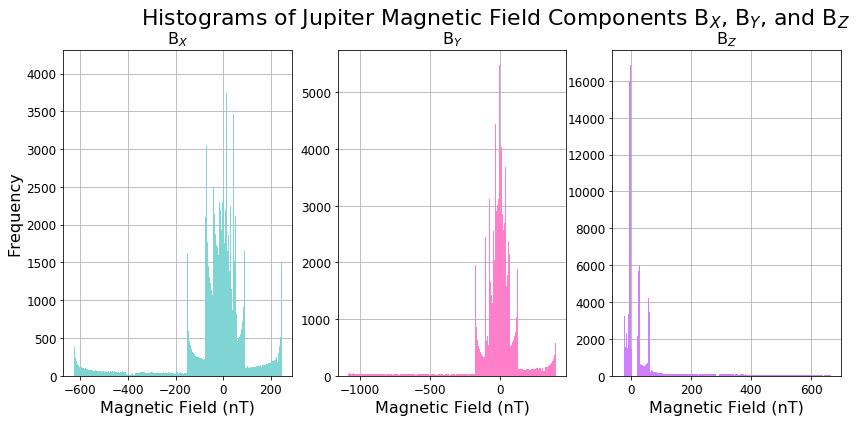

In [19]:
# next, plot histograms of the magnetic field components

# set up the figure 
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Histograms of Jupiter Magnetic Field Components B$_{X}$, B$_{Y}$, and B$_{Z}$', fontsize=22)

# set up the grid spec for the three subplots
gs = plt.GridSpec(1, 3, hspace=0.2, wspace=0.2, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

# number of bins for the histogram is square root of the sample size
# use the resampled dataset but with the nanMask so it doesn't count
# the length including the nan's
sampleSize = len(oneSecDataFGM.loc[nanMask, 'B_X'])
# np.ceil rounds up
numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

# plot the histograms using the nanMask
ax1.hist(oneSecDataFGM.loc[nanMask,'B_X'], bins = int(numBins), 
         facecolor = '#7fd5d4', zorder=10)
ax1.set_title('B$_{X}$', fontsize=16)
ax1.set_xlabel('Magnetic Field (nT)', fontsize=16)
ax1.set_ylabel('Frequency', fontsize=16)
ax1.tick_params(labelsize = 12)

ax2.hist(oneSecDataFGM.loc[nanMask,'B_Y'], bins = int(numBins), 
         facecolor = '#ff7fcb', zorder=10)
ax2.set_title('B$_{Y}$', fontsize=16)
ax2.set_xlabel('Magnetic Field (nT)', fontsize=16)
ax2.tick_params(labelsize = 12)

ax3.hist(oneSecDataFGM.loc[nanMask,'B_Z'], bins = int(numBins), 
         facecolor = '#d07fff', zorder=10)
ax3.set_title('B$_{Z}$', fontsize=16)
ax3.set_xlabel('Magnetic Field (nT)', fontsize=16)
ax3.tick_params(labelsize = 12)

#set up the grid
ax1.grid()
ax2.grid()
ax3.grid()

# save figure to figures folder
plt.savefig('./Figures/MagFieldHistograms.png', dpi=300)

In [20]:
# also kind of funky looking, so let's see what the statistics say

# Bx component
print("Distribution of the Bx statistics:\n" +
        "Skew: {:.1f}, Kurtosis: {:.1f}, Std Dev: {:.1f}, Mean: {:.1f}".format(
        skew(oneSecDataFGM.loc[nanMask, 'B_X']), 
        kurtosis(oneSecDataFGM.loc[nanMask, 'B_X'], fisher = False), 
        np.std(oneSecDataFGM.loc[nanMask, 'B_X'], ddof = 1), 
        np.mean(oneSecDataFGM.loc[nanMask, 'B_X'])))
# calculate and print median
print("The median of the Bx component is: {:.1f}".format( 
      np.median(oneSecDataFGM.loc[nanMask, 'B_X'])))

# calcualte and print chi-squared test
# This command ended up not working the way I thought it should. I have
# re-done the chi-squared test using the 4-bin method learned in class,
# and then used the chisquare function which gave me more reasonable results
#chiBX = chisquare(oneSecDataFGM.loc[nanMask, 'B_X'])
#print("The chi-squared value of the Bx component is: {:.1f}".format(chiBX[0]))
#print("The probability of that value is: {:.1f}%".format(100*chiBX[1]))


# By component
print("\nDistribution of the By statistics:\n" +
        "Skew: {:.1f}, Kurtosis: {:.1f}, Std Dev: {:.1f}, Mean: {:.1f}".format(
        skew(oneSecDataFGM.loc[nanMask, 'B_Y']), 
        kurtosis(oneSecDataFGM.loc[nanMask, 'B_Y'], fisher = False), 
        np.std(oneSecDataFGM.loc[nanMask, 'B_Y'], ddof = 1), 
        np.mean(oneSecDataFGM.loc[nanMask, 'B_Y'])))
# calculate and print median
print("The median of the By component is: {:.1f}".format( 
      np.median(oneSecDataFGM.loc[nanMask, 'B_Y'])))

# calcualte and print chi-squared test
# see above for why this is commented out
#chiBY = chisquare(oneSecDataFGM.loc[nanMask, 'B_Y'])
#print("The chi-squared value of the By component is: {:.1f}".format(chiBY[0]))
#print("The probability of that value is: {:.1f}%".format(100*chiBY[1]))


# Bz component
print("\nDistribution of the Bz statistics:\n" +
        "Skew: {:.1f}, Kurtosis: {:.1f}, Std Dev: {:.1f}, Mean: {:.1f}".format(
        skew(oneSecDataFGM.loc[nanMask, 'B_Z']), 
        kurtosis(oneSecDataFGM.loc[nanMask, 'B_Z'], fisher = False), 
        np.std(oneSecDataFGM.loc[nanMask, 'B_Z'], ddof = 1), 
        np.mean(oneSecDataFGM.loc[nanMask, 'B_Z'])))
# caclulate and print median
print("The median of the Bz component is: {:.1f}".format( 
      np.median(oneSecDataFGM.loc[nanMask, 'B_Z'])))

# calcualte and print chi-squared test
# see above for why this is commented out
#chiBZ = chisquare(oneSecDataFGM.loc[nanMask, 'B_Z'])
#print("The chi-squared value of the Bz component is: {:.1f}".format(chiBZ[0]))
#print("The probability of that value is: {:.1f}%".format(100*chiBZ[1]))

Distribution of the Bx statistics:
Skew: -2.1, Kurtosis: 8.8, Std Dev: 151.7, Mean: -29.4
The median of the Bx component is: -5.7

Distribution of the By statistics:
Skew: -2.5, Kurtosis: 15.7, Std Dev: 179.2, Mean: -12.8
The median of the By component is: -0.9

Distribution of the Bz statistics:
Skew: 2.9, Kurtosis: 11.3, Std Dev: 122.3, Mean: 53.6
The median of the Bz component is: 0.6


In [21]:
# Chi-Squared for Bx magnetic field component
# find mean and standard deviation
meanX = np.mean(oneSecDataFGM.loc[nanMask, 'B_X'])
stdX = np.std(oneSecDataFGM.loc[nanMask, 'B_X'], ddof = 1)

# create 4 bins using logial indexing
xBin1 = oneSecDataFGM['B_X'] < (meanX - stdX)
xBin2 = ((oneSecDataFGM['B_X'] >= (meanX - stdX)) & 
         (oneSecDataFGM['B_X'] < meanX))
xBin3 = ((oneSecDataFGM['B_X'] >= meanX) &
         (oneSecDataFGM['B_X'] < (meanX + stdX)))
xBin4 = oneSecDataFGM['B_X'] >= (meanX + stdX)

# sum up number observed in each bin
xObs = [np.sum(xBin1), np.sum(xBin2), np.sum(xBin3), np.sum(xBin4)]
# expected in each bin is 16%, 34%, 34%, 16% for a normal distribution
xExpected = [expect16, expect34, expect34, expect16]

# now use chisquare function with the counts of the observed values in each bin
chiBX = chisquare(xObs, xExpected)

# [0] has the chi-sqaure number
print("Chi-Squared for Bx magnetic field component = {:.2f}".format(chiBX[0]))
# [1] has the p-value (the probability)
print("Probability = {:.2f}".format(chiBX[1]))

Chi-Squared for Bx magnetic field component = 40529.25
Probability = 0.00


In [22]:
# Chi-Sqaured for By magnetic field component
# find mean and standard deviation
meanY = np.mean(oneSecDataFGM.loc[nanMask, 'B_Y'])
stdY = np.std(oneSecDataFGM.loc[nanMask, 'B_Y'], ddof = 1)

# create 4 bins using logical indexing
yBin1 = oneSecDataFGM['B_Y'] < (meanY - stdY)
yBin2 = ((oneSecDataFGM['B_Y'] >= (meanY - stdY)) & 
         (oneSecDataFGM['B_Y'] < meanY))
yBin3 = ((oneSecDataFGM['B_Y'] >= meanY) &
         (oneSecDataFGM['B_Y'] < (meanY + stdY)))
yBin4 = oneSecDataFGM['B_Y'] >= (meanY + stdY)

# sum up number observed in each bin
yObs = [np.sum(yBin1), np.sum(yBin2), np.sum(yBin3), np.sum(yBin4)]
# expected in each bin is 16%, 34%, 34%, 16% for a normal distribution
yExpected = [expect16, expect34, expect34, expect16]

# now use chisquare function with the counts of the observed values in each bin
chiBY = chisquare(yObs, yExpected)

# [0] has the chi-square number
print("Chi-Squared for By magnetic field component = {:.2f}".format(chiBY[0]))
# [1] has the p-value (the probability)
print("Probability = {:.2f}".format(chiBY[1]))

Chi-Squared for By magnetic field component = 40537.39
Probability = 0.00


In [23]:
# Chi-Sqaured for Bz magnetic field component
# find the mean and standard deviation
meanZ = np.mean(oneSecDataFGM.loc[nanMask, 'B_Z'])
stdZ = np.std(oneSecDataFGM.loc[nanMask, 'B_Z'], ddof = 1)

# create 4 bins using logical indexing
zBin1 = oneSecDataFGM['B_Z'] < (meanZ - stdZ)
zBin2 = ((oneSecDataFGM['B_Z'] >= (meanZ - stdZ)) & 
         (oneSecDataFGM['B_Z'] < meanZ))
zBin3 = ((oneSecDataFGM['B_Z'] >= meanZ) &
         (oneSecDataFGM['B_Z'] < (meanZ + stdZ)))
zBin4 = oneSecDataFGM['B_Z'] >= (meanZ + stdZ)

# sum up number observed in each bin
zObs = [np.sum(zBin1), np.sum(zBin2), np.sum(zBin3), np.sum(zBin4)]
# expected in each bin is 16%, 34%, 34%, 16% for a normal distribution
zExpected = [expect16, expect34, expect34, expect16]

# now use chisquare function with the counts of the observed values in each bin
chiBZ = chisquare(zObs, zExpected)

# [0] has the chi-square number
print("Chi-Squared for Bz magnetic field component = {:.2f}".format(chiBZ[0]))
# [1] has the p-value (the probability)
print("Probability = {:.2f}".format(chiBZ[1]))

Chi-Squared for Bz magnetic field component = 118362.23
Probability = 0.00


Again, the probabilities below 0.05 means that the null hypothesis of the magnetic field components following normal distributions can be rejected. This confirms what can be seen in the magnetic field components histograms: the distributions are not normal.

### Step 3C: Propagate and present uncertainty appropriately in a calculation
To model Jupiter's magnetic field, I will need to add both the position vectors and magnetic field component vectors together in quadrature. I know there is a small amount of error on the magnetic field components (+/- 0.05 nT for measurements under 1600 nT), so I'll propagate this through the quadrature calculation for the magnetic field components. I have not been able to find any documentation on error in the position vectors.

Source: Connerney et. al https://link.springer.com/article/10.1007/s11214-017-0334-z

In [24]:
# First, calculate the magntitude of magnetic field

# B_mag =  adding in quadrature (sqrt(Bx^2 + By^2 + Bz^2))
magnitude = extfunc.addQuadrature(oneSecDataFGM['B_X'], 
                             oneSecDataFGM['B_Y'], oneSecDataFGM['B_Z'])

# add it to the dataframe
oneSecDataFGM['B_MAG'] = magnitude

# set the resolution (the error)
resolution = 0.05 # nT

# calculate each individual error
errorX = (oneSecDataFGM['B_X'] / magnitude) * resolution
errorY = (oneSecDataFGM['B_Y'] / magnitude) * resolution
errorZ = (oneSecDataFGM['B_Z'] / magnitude) * resolution

# add in quadrature
magnitudeError = extfunc.addQuadrature(errorX, errorY, errorZ)

# add it to the dataframe
oneSecDataFGM['B_MAG_ERROR'] = magnitudeError

# print the header lines of the dataframe
oneSecDataFGM.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z,POS_X_RJ,POS_Y_RJ,POS_Z_RJ,B_MAG,B_MAG_ERROR
DATETIME,,,,,,,,,,,,,
2017-10-23 00:00:00,2017 296 0 0 0,666.0,20.76,5.09,0.69,1940319.855,831089.460,293828.488,27.140377,11.624930,4.109949,21.386019,0.05
2017-10-23 00:00:01,2017 296 0 0 1,478.0,20.73,5.10,0.71,1940431.649,830809.135,293829.098,27.141941,11.621008,4.109958,21.359939,0.05
2017-10-23 00:00:02,2017 296 0 0 2,478.0,20.77,5.13,0.73,1940569.187,830464.101,293829.848,27.143865,11.616182,4.109968,21.406604,0.05
2017-10-23 00:00:03,2017 296 0 0 3,478.0,20.82,5.21,0.69,1940706.665,830119.043,293830.599,27.145788,11.611356,4.109979,21.473067,0.05
2017-10-23 00:00:04,2017 296 0 0 4,478.0,20.84,5.28,0.64,1940844.081,829773.963,293831.349,27.147710,11.606529,4.109989,21.507989,0.05
2017-10-23 00:00:05,2017 296 0 0 5,478.0,20.87,5.32,0.65,1940981.435,829428.860,293832.100,27.149631,11.601702,4.110000,21.547199,0.05
2017-10-23 00:00:06,2017 296 0 0 6,478.0,20.88,5.29,0.63,1941118.729,829083.734,293832.850,27.151552,11.596874,4.110010,21.548907,0.05
2017-10-23 00:00:07,2017 296 0 0 7,478.0,20.91,5.28,0.67,1941255.961,828738.586,293833.600,27.153471,11.592046,4.110021,21.576733,0.05
2017-10-23 00:00:08,2017 296 0 0 8,478.0,20.93,5.26,0.75,1941393.131,828393.415,293834.351,27.155390,11.587218,4.110031,21.593865,0.05


In [25]:
# look at an index where I know there's high magnetic field (early in the 3rd day)
print(oneSecDataFGM.loc['2017-10-25 00:01:00'])

DATETIME       2017 298 0 1 0
MSEC                      513
B_X                     34.98
B_Y                  -1078.86
B_Z                    662.58
POS_X                 20712.2
POS_Y                  362887
POS_Z                 -461659
POS_X_RJ             0.289713
POS_Y_RJ              5.07591
POS_Z_RJ              -6.4575
B_MAG                 1266.56
B_MAG_ERROR              0.05
Name: 2017-10-25 00:01:00, dtype: object


In [26]:
# the magnetic field would be reported like this:
print("On 2017-10-25 at 00:01:00 UT, the total magnetic field magnitude " +
      "was measured to be: {:.2f} +/- {:.2f} nT".format(oneSecDataFGM.loc['2017-10-25 00:01:00', 'B_MAG'],
      oneSecDataFGM.loc['2017-10-25 00:01:00', 'B_MAG_ERROR']))

On 2017-10-25 at 00:01:00 UT, the total magnetic field magnitude was measured to be: 1266.56 +/- 0.05 nT


Even when Juno measured a high magnetic field, the error is still negligible and doesn't stray from the 0.05 nT resolution.

### Step 3D: Fit Evaluation
#### Create a model of Jupiter's magnetic field as a perfect dipole

In [27]:
# using the planetocentric coordinates, I can model Jupiter's dipole using the dipole equation:
# |B| = (B0/R^3)*sqrt(1+3sin^2(lambda))
# where R is the distance from Jupiter (in Jupiter radii)
# and lambda is the angle measured northwards from the geomagnetic equator

# Jupiter has a 9.4 degree tilt of its magnetic axis from the rotational axis
# to determine R:
# theta = arccos(z/R)-9.4
# R = sqrt(x^2+y^2+z^2) = POS_MAG

# start from the bottom and work our way up
POS_MAG = extfunc.addQuadrature(oneSecDataFGM['POS_X_RJ'], oneSecDataFGM['POS_Y_RJ'],
                               oneSecDataFGM['POS_Z_RJ']) #in RJ
# add to the dataframe
oneSecDataFGM['POS_MAG'] = POS_MAG #in RJ

# np.arccos returns radians
# convert 9.4 degrees to radians
theta = np.arccos(oneSecDataFGM['POS_Z_RJ'] / oneSecDataFGM['POS_MAG']) - ((9.4 * np.pi) / 180) #in radians

# add to dataframe
oneSecDataFGM['THETA'] = theta #in radians

# Now to model the magnetic field
# set Jupiter's B0 - source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
# 4.3 Gauss
B0 = 4.3 * 10**(-4) #Teslas

# theta is measured from the verical Z axis, and I need lamba as measured from the geomagnetic equator
# subtract theta from 90 degrees, or pi/2
lambdaPOS = (np.pi / 2) - oneSecDataFGM['THETA'] #in radians

# add to dataframe
oneSecDataFGM['LAMBDA'] = lambdaPOS #in radians

# finally, the model:
BModelOrig = ((B0 / (oneSecDataFGM['POS_MAG']**3)) * np.sqrt(1 + 3 * (np.sin(oneSecDataFGM['LAMBDA']))**2)) #T
# convert from T to nT
BModelOrig = np.absolute(BModelOrig) * 10**9 #nT

# add to dataframe
oneSecDataFGM['B_MODEL_ORIG'] = BModelOrig

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in arccos


In [28]:
# check what the dataframe looks like now with all the additional columns added
oneSecDataFGM.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z,POS_X_RJ,POS_Y_RJ,POS_Z_RJ,B_MAG,B_MAG_ERROR,POS_MAG,THETA,LAMBDA,B_MODEL_ORIG
DATETIME,,,,,,,,,,,,,,,,,
2017-10-23 00:00:00,2017 296 0 0 0,666.0,20.76,5.09,0.69,1940319.855,831089.460,293828.488,27.140377,11.624930,4.109949,21.386019,0.05,29.809910,1.268423,0.302373,18.264534
2017-10-23 00:00:01,2017 296 0 0 1,478.0,20.73,5.10,0.71,1940431.649,830809.135,293829.098,27.141941,11.621008,4.109958,21.359939,0.05,29.809806,1.268422,0.302374,18.264735
2017-10-23 00:00:02,2017 296 0 0 2,478.0,20.77,5.13,0.73,1940569.187,830464.101,293829.848,27.143865,11.616182,4.109968,21.406604,0.05,29.809678,1.268421,0.302375,18.264982
2017-10-23 00:00:03,2017 296 0 0 3,478.0,20.82,5.21,0.69,1940706.665,830119.043,293830.599,27.145788,11.611356,4.109979,21.473067,0.05,29.809551,1.268420,0.302376,18.265229
2017-10-23 00:00:04,2017 296 0 0 4,478.0,20.84,5.28,0.64,1940844.081,829773.963,293831.349,27.147710,11.606529,4.109989,21.507989,0.05,29.809423,1.268419,0.302377,18.265475
2017-10-23 00:00:05,2017 296 0 0 5,478.0,20.87,5.32,0.65,1940981.435,829428.860,293832.100,27.149631,11.601702,4.110000,21.547199,0.05,29.809295,1.268418,0.302378,18.265722
2017-10-23 00:00:06,2017 296 0 0 6,478.0,20.88,5.29,0.63,1941118.729,829083.734,293832.850,27.151552,11.596874,4.110010,21.548907,0.05,29.809167,1.268417,0.302379,18.265969
2017-10-23 00:00:07,2017 296 0 0 7,478.0,20.91,5.28,0.67,1941255.961,828738.586,293833.600,27.153471,11.592046,4.110021,21.576733,0.05,29.809039,1.268416,0.302380,18.266216
2017-10-23 00:00:08,2017 296 0 0 8,478.0,20.93,5.26,0.75,1941393.131,828393.415,293834.351,27.155390,11.587218,4.110031,21.593865,0.05,29.808911,1.268415,0.302381,18.266463


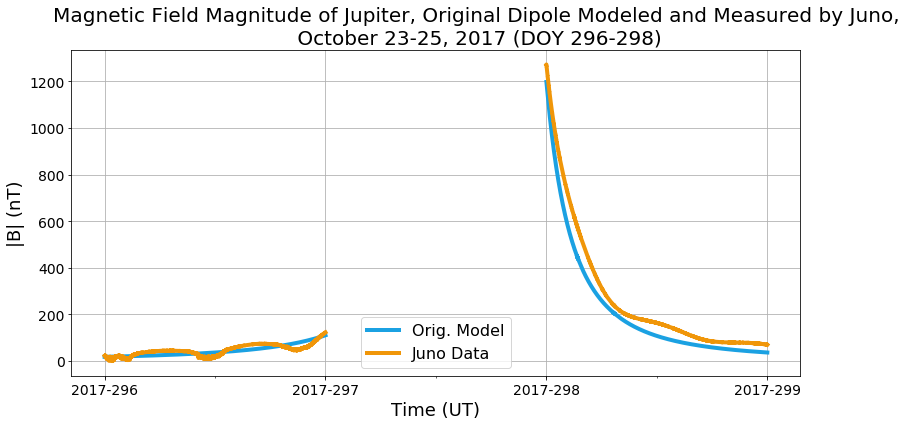

In [29]:
# compare the model and actual data

# set up the figure 
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Original Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM['B_MODEL_ORIG'], color='#1ba1e2', label='Orig. Model', linewidth=4.0)
ax1.plot(oneSecDataFGM['B_MAG'], color='#f09609', label='Juno Data', linewidth=4.0)

# add a grid
ax1.grid()

# set up the x-axis for the time
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

# set labels and increase size of fonts
ax1.set_xlabel('Time (UT)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='lower center', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/OrigModelAndMagDataLines.png', dpi=300)

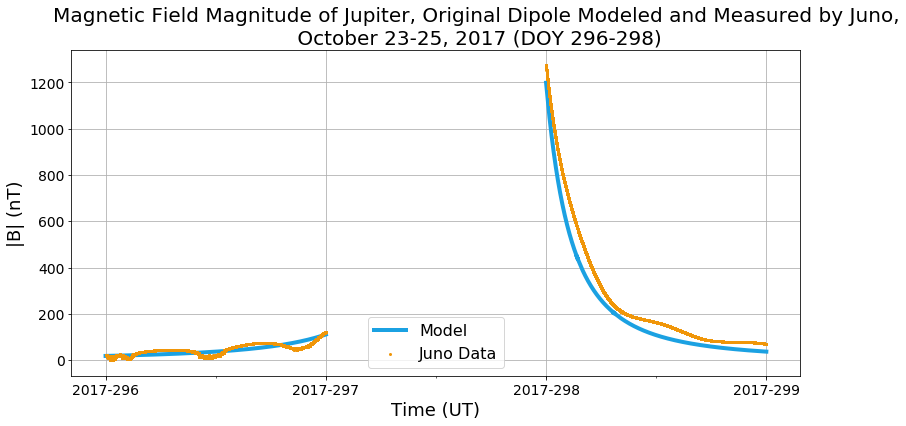

In [30]:
# compare the model and actual data

# set up the figure 
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Original Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_ORIG'], color='#1ba1e2',
         label='Model', linewidth=4.0, zorder=20)
# plot data with a scatter plot instead of a line
ax1.scatter(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=4.0, zorder=30)

# add a grid
ax1.grid()

# set up the x-axis for the time
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

# set labels and increase size of fonts
ax1.set_xlabel('Time (UT)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='lower center', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/OrigModelAndMagDataScatter.png', dpi=300)

#### Fine tuning the model - changing coefficients
In some older papers, I have seen the Equatorial surface field reported to be lower than what I used above. From Lanzerotti & Krimigis, Jupiter's equatorial surface field is reported to be 4.1 Gauss (rather than 4.3 Gauss used above). I'll see how that changes the model.

Source: https://physicstoday.scitation.org/doi/10.1063/1.880990

In [31]:
B0 = 4.1 * 10**(-4) #Teslas

BModelTest1 = ((B0 / (oneSecDataFGM['POS_MAG']**3)) * np.sqrt(1 + 3 * (np.sin(oneSecDataFGM['LAMBDA']))**2)) #T
# convert from T to nT
BModelTest1 = np.absolute(BModelTest1) * 10**9 #nT

oneSecDataFGM['B_MODEL_TEST1'] = BModelTest1

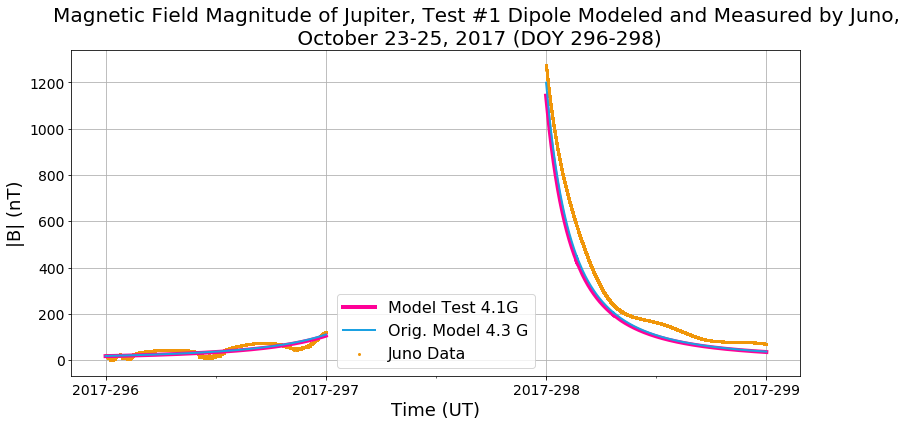

In [32]:
# compare the new model and actual data

# set up the figure 
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Test #1 Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_TEST1'], color='#ff0097',
         label='Model Test 4.1G', linewidth=4.0, zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_ORIG'], color='#1ba1e2',
         label='Orig. Model 4.3 G', linewidth=2.0, zorder=20)
ax1.scatter(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=4.0, zorder=20)

# add a grid
ax1.grid()

# set up the x-axis for the time
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

# set labels and increase size of fonts
ax1.set_xlabel('Time (UT)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='lower center', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/TestModel1AndMagDataScatter.png', dpi=300)

Okay, lowering the magnetic field strength didn't improve the model. What if I increase the magnetic field strength by 0.2G (putting it at 4.5G)?

In [33]:
B0 = 4.5 * 10**(-4) #Teslas

BModelTest2 = ((B0 / (oneSecDataFGM['POS_MAG']**3)) * np.sqrt(1 + 3 * (np.sin(oneSecDataFGM['LAMBDA']))**2)) #T
# convert from T to nT
BModelTest2 = np.absolute(BModelTest2) * 10**9 #nT

oneSecDataFGM['B_MODEL_TEST2'] = BModelTest2

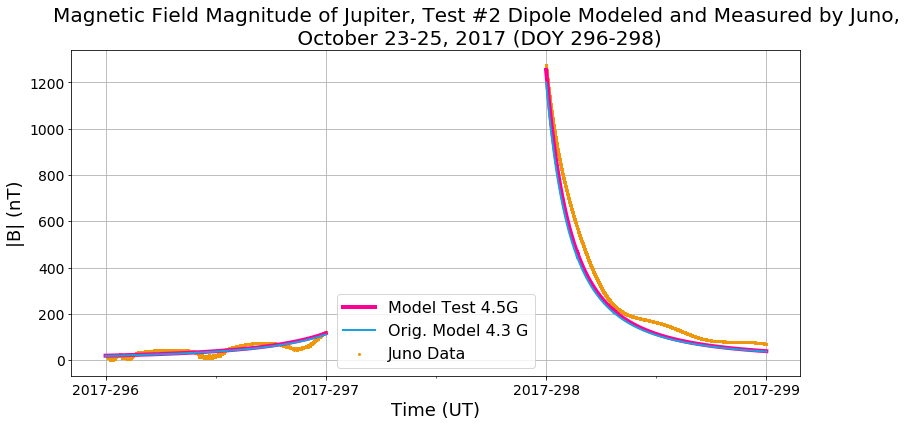

In [34]:
# compare the new model and actual data

# set up the figure 
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Test #2 Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_TEST2'], color='#ff0097',
         label='Model Test 4.5G', linewidth=4.0, zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_ORIG'], color='#1ba1e2',
         label='Orig. Model 4.3 G', linewidth=2.0, zorder=20)
ax1.scatter(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=4.0, zorder=20)

# add a grid
ax1.grid()

# set up the x-axis for the time
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

# set labels and increase size of fonts
ax1.set_xlabel('Time (UT)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='lower center', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/TestModel2AndMagDataScatter.png', dpi=300)

This one gets closer the the highest measured magnitude of the magnetic field, but still falls short for the majority of DOY 298. Let's increase by another 0.2G.

In [35]:
B0 = 4.7 * 10**(-4) #Teslas

BModelTest3 = ((B0 / (oneSecDataFGM['POS_MAG']**3)) * np.sqrt(1 + 3 * (np.sin(oneSecDataFGM['LAMBDA']))**2)) #T
# convert from T to nT
BModelTest3 = np.absolute(BModelTest3) * 10**9 #nT

oneSecDataFGM['B_MODEL_TEST3'] = BModelTest3

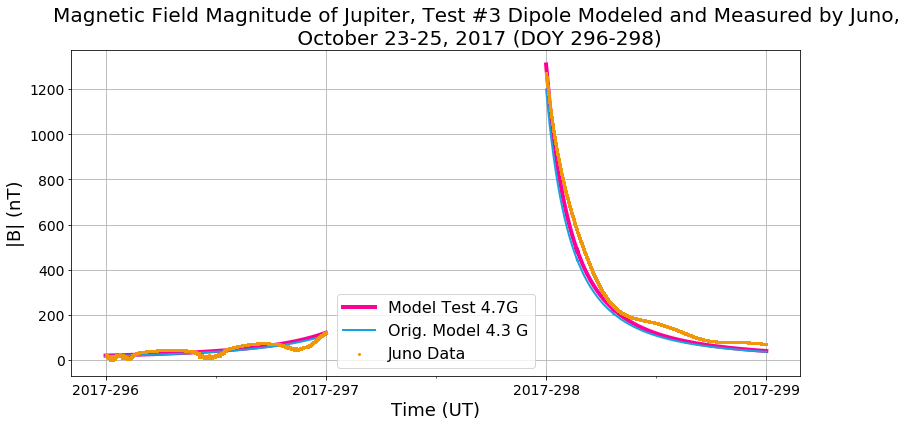

In [36]:
# compare the new model and actual data

# set up the figure 
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Test #3 Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_TEST3'], color='#ff0097',
         label='Model Test 4.7G', linewidth=4.0, zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_ORIG'], color='#1ba1e2',
         label='Orig. Model 4.3 G', linewidth=2.0, zorder=20)
ax1.scatter(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=4.0, zorder=30)

# add a grid
ax1.grid()

# set up the x-axis for the time
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

# set labels and increase size of fonts
ax1.set_xlabel('Time (UT)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='lower center', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/TestModel3AndMagDataScatter.png', dpi=300)

This overestimates the highest measured magnetic field, but it gets slightly closer to the measured data on DOY 298 (though it still under-predicts).

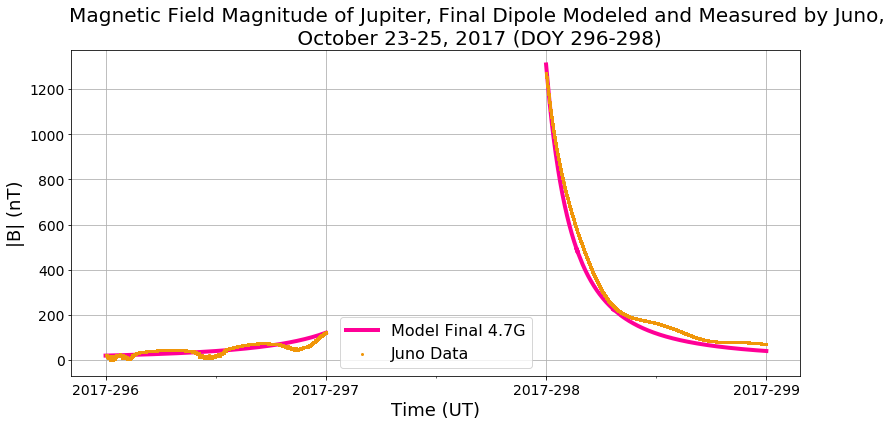

In [37]:
# save this model to be the final model
oneSecDataFGM['B_MODEL_FINAL'] = BModelTest3

# plot this as the final model:
# set up figure
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Final Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MODEL_FINAL'], color='#ff0097',
         label='Model Final 4.7G', linewidth=4.0, zorder=20)
ax1.scatter(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=4.0, zorder=30)

# add a grid
ax1.grid()

# set up the x-axis for the time
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

# set labels and increase size of fonts
ax1.set_xlabel('Time (UT)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='lower center', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/FinalModelAndMagDataScatter.png', dpi=300)

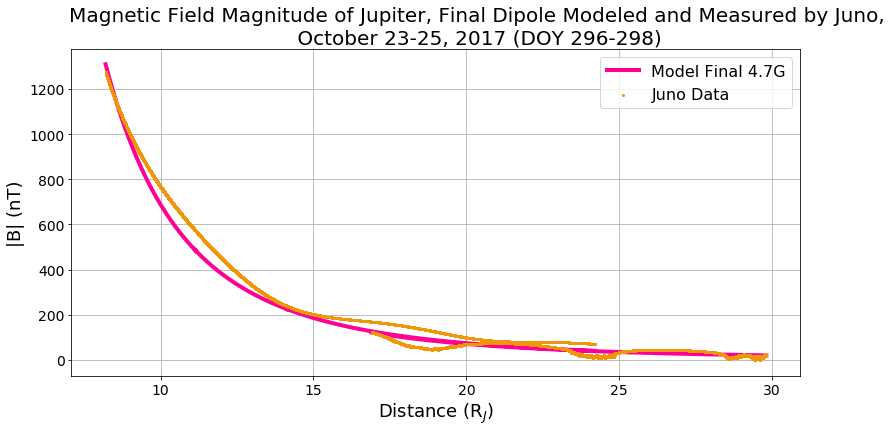

In [38]:
# plot against Jupiter radii distance, rather than time zeries
# set up figure
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Final Dipole Modeled and Measured by Juno,' +
             '\n October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MODEL_FINAL'], color='#ff0097',
         label='Model Final 4.7G', linewidth=4.0, zorder=20)
ax1.scatter(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=4.0, zorder=30)

# add a grid
ax1.grid()

# set labels and increase size of fonts
ax1.set_xlabel('Distance (R$_{J}$)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# add a legend
ax1.legend(loc='upper right', prop={'size':16})

# save figure to figures folder
plt.savefig('./Figures/FinalModelAndMagScatterVsJupiterRadii.png', dpi=300)

#### Fit performance metrics (a complete error analysis - including bootstrap analysis)
##### Accuracy - how close the model is to the data

In [39]:
# show the help menu on line error function (lr)
# linerror external function written by T.A. Azari
# linerror can calculate the error on the coefficients
# and calculate root mean square error
help(lr)

Help on module linerror:

NAME
    linerror - linearerror.py

DESCRIPTION
    - Written on 2/13/2018 for CLaSP 405 by Lab TA A. Azari. 
    Purpose:
    - To calculate with x and y the error on the coefficents
    as demonstrated in eqn. 8.15, 8.16, 8.17 in Taylor - 
    An Introduction to Error Analysis.

FUNCTIONS
    calcCoeffsErr(x, rootMeanSquareError)
        This function calculates the error on the coefficents or
        equation 8.16 & 8.17 in Taylor. Inputs are the x values 
        of the equation and the RMSE on the fit. 
        
        Outputs the error on the slope, THEN on the intercept.
    
    calcRMSE(yModel, yData)
        This calculates sigma y, or equation 8.15 in Taylor. Outputs
        error on the fit of regressions.

FILE
    c:\users\emmac\405 final project conrad\linerror.py




In [40]:
# I want to calculate the RMSE
# I need another nanMask, the one I created before was for the components
# remind myself what's in my dataframe
oneSecDataFGM.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z,POS_X_RJ,POS_Y_RJ,...,B_MAG,B_MAG_ERROR,POS_MAG,THETA,LAMBDA,B_MODEL_ORIG,B_MODEL_TEST1,B_MODEL_TEST2,B_MODEL_TEST3,B_MODEL_FINAL
DATETIME,,,,,,,,,,,,,,,,,,,,,
2017-10-23 00:00:00,2017 296 0 0 0,666.0,20.76,5.09,0.69,1940319.855,831089.460,293828.488,27.140377,11.624930,...,21.386019,0.05,29.809910,1.268423,0.302373,18.264534,17.415021,19.114048,19.963561,19.963561
2017-10-23 00:00:01,2017 296 0 0 1,478.0,20.73,5.10,0.71,1940431.649,830809.135,293829.098,27.141941,11.621008,...,21.359939,0.05,29.809806,1.268422,0.302374,18.264735,17.415212,19.114258,19.963780,19.963780
2017-10-23 00:00:02,2017 296 0 0 2,478.0,20.77,5.13,0.73,1940569.187,830464.101,293829.848,27.143865,11.616182,...,21.406604,0.05,29.809678,1.268421,0.302375,18.264982,17.415448,19.114516,19.964050,19.964050
2017-10-23 00:00:03,2017 296 0 0 3,478.0,20.82,5.21,0.69,1940706.665,830119.043,293830.599,27.145788,11.611356,...,21.473067,0.05,29.809551,1.268420,0.302376,18.265229,17.415683,19.114774,19.964320,19.964320
2017-10-23 00:00:04,2017 296 0 0 4,478.0,20.84,5.28,0.64,1940844.081,829773.963,293831.349,27.147710,11.606529,...,21.507989,0.05,29.809423,1.268419,0.302377,18.265475,17.415918,19.115032,19.964589,19.964589
2017-10-23 00:00:05,2017 296 0 0 5,478.0,20.87,5.32,0.65,1940981.435,829428.860,293832.100,27.149631,11.601702,...,21.547199,0.05,29.809295,1.268418,0.302378,18.265722,17.416154,19.115291,19.964859,19.964859
2017-10-23 00:00:06,2017 296 0 0 6,478.0,20.88,5.29,0.63,1941118.729,829083.734,293832.850,27.151552,11.596874,...,21.548907,0.05,29.809167,1.268417,0.302379,18.265969,17.416389,19.115549,19.965129,19.965129
2017-10-23 00:00:07,2017 296 0 0 7,478.0,20.91,5.28,0.67,1941255.961,828738.586,293833.600,27.153471,11.592046,...,21.576733,0.05,29.809039,1.268416,0.302380,18.266216,17.416624,19.115807,19.965399,19.965399
2017-10-23 00:00:08,2017 296 0 0 8,478.0,20.93,5.26,0.75,1941393.131,828393.415,293834.351,27.155390,11.587218,...,21.593865,0.05,29.808911,1.268415,0.302381,18.266463,17.416860,19.116066,19.965668,19.965668


In [41]:
# I will be calculating the RMSE with B_MAG and B_MODEL_FINAL
# nanMask for B
nanMaskB = ((~np.isnan(oneSecDataFGM['B_MAG'])) &
           (~np.isnan(oneSecDataFGM['B_MODEL_FINAL'])))

In [42]:
RMSE = lr.calcRMSE(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'],
                   oneSecDataFGM.loc[nanMaskB, 'B_MAG'])
print(RMSE)

31.971420758503136


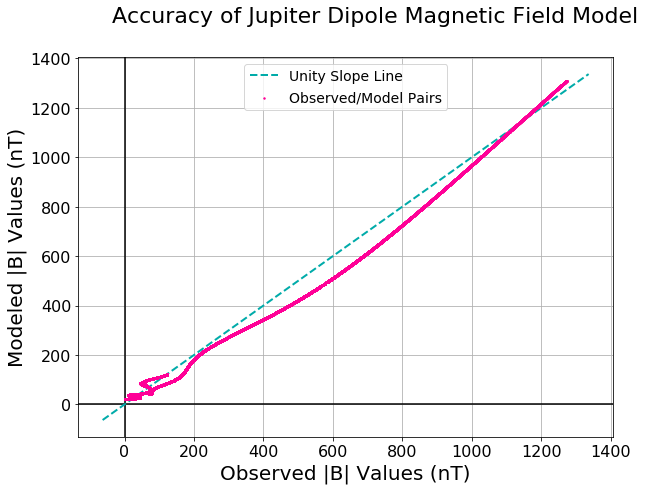

In [43]:
# plot to visualize accuracy
# plot the model value and observed value pairs
# if accuracy is good, they should plot along the unity slope line

# initialize figure
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Accuracy of Jupiter Dipole Magnetic Field Model', fontsize=22)

# add subplot
ax1 = fig.add_subplot(gs[0,0])

# scatter plot the observed value and model value pairs
ax1.scatter(oneSecDataFGM.loc[nanMaskB, 'B_MAG'], oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'],
            zorder=30, color='#ff0097', s=2, label='Observed/Model Pairs')

# plot the unity slope line
# slightly adapted from method found on stack overflow:
# https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
axes = plt.gca()
xUnity = np.array(axes.get_xlim())
yUnity = xUnity
plt.plot(xUnity, yUnity, '--', zorder=20, color='#00aba9', label='Unity Slope Line', linewidth=2)

# set up titles for axes
ax1.set_xlabel('Observed |B| Values (nT)', fontsize = 20)
ax1.set_ylabel('Modeled |B| Values (nT)', fontsize = 20)

# make the tick labels larger
ax1.tick_params(labelsize = 16)

# add grid
ax1.grid(zorder=0)

# add legend
ax1.legend(fontsize=14);

# add axis lines
ax1.axhline(y=0.0, color='k', zorder=10)
ax1.axvline(x=0.0, color='k', zorder=10);

# save figure to the figures folder
plt.savefig('./Figures/ModelAccuracy.png', dpi=300)

In [44]:
# calculate the RMSE as a percentage of the range of the data
# first, find range of the data
rangeBMag = max(oneSecDataFGM.loc[nanMaskB, 'B_MAG']) - min(oneSecDataFGM.loc[nanMaskB, 'B_MAG'])
print(rangeBMag)

1272.6532892239716


In [45]:
percentRMSE = (RMSE / rangeBMag) * 100
print("The RMSE of {:.1f} is about {:.1f}% of the range of the |B| data.".format(
    RMSE, percentRMSE))

The RMSE of 32.0 is about 2.5% of the range of the |B| data.


This model is quite accurate. The data dips a little bit in the mid-range |B| values, but the model/observed pairs lie pretty much along the unity slope line. Plus, the RMSE is a small percentage of the range of the data.

##### Bias - the discrepancy between the model to the data

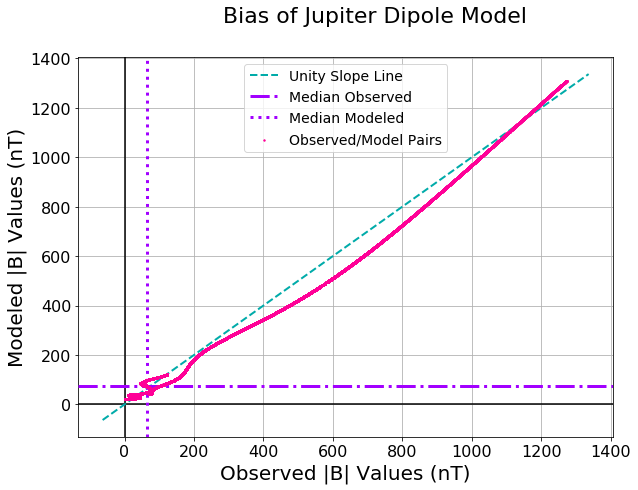

In [46]:
# bias = mean(model) - mean(y values)
# could also be median, mode, etc.
# because the distribution is not normal and I reported median previously,
# I will use median to calculate the bias

# initialize figure
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Bias of Jupiter Dipole Model', fontsize=22)

# add subplot
ax1 = fig.add_subplot(gs[0,0])

# scatter plot the observed value and model value pairs
ax1.scatter(oneSecDataFGM.loc[nanMaskB, 'B_MAG'], oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'],
            zorder=30, color='#ff0097', s=2, label='Observed/Model Pairs')

# plot the unity slope line
# slightly adapted from method found on stack overflow:
# https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
axes = plt.gca()
xUnity = np.array(axes.get_xlim())
yUnity = xUnity
plt.plot(xUnity, yUnity, '--', zorder=20, color='#00aba9', lw=2, label='Unity Slope Line')

# set up titles for axes
ax1.set_xlabel('Observed |B| Values (nT)', fontsize = 20)
ax1.set_ylabel('Modeled |B| Values (nT)', fontsize = 20)

# make the tick labels larger
ax1.tick_params(labelsize = 16)

# add grid
ax1.grid(zorder=0)

# add axis lines
ax1.axhline(y=0.0, color='k', zorder=10)
ax1.axvline(x=0.0, color='k', zorder=10)

# add median lines
ax1.axhline(y=np.median(oneSecDataFGM.loc[nanMaskB, 'B_MAG']), color='#a200ff',
            linestyle='-.', lw=3, label='Median Observed', zorder=20)
ax1.axvline(x=np.median(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL']), color='#a200ff',
            linestyle=':', lw=3, label='Median Modeled', zorder=20)

# add legend
ax1.legend(fontsize=14);

# save figure to the figures folder
plt.savefig('./Figures/ModelBias.png', dpi=300)

In [47]:
# calculate bias using medians
bias = np.median(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL']) - np.median(oneSecDataFGM.loc[nanMaskB, 'B_MAG'])
print("The bias of the model is: {:.1f}".format(bias))

The bias of the model is: -12.3


The bias of this model is not very good. Because the bias is less than zero, the model consistently underestimates the data. This was seen visually in the plot of the data vs. model time series.

##### Association - how well the model and data move together

In [48]:
# calculate r - the linear correlation coefficient
# use numpy corrcoef
r = np.corrcoef(oneSecDataFGM.loc[nanMaskB, 'B_MAG'], oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'])
print(r)

[[1.        0.9938378]
 [0.9938378 1.       ]]


In [49]:
# corrcoef gives a matrix back, which corresponds to the correlation between
# [A&A A&B]
# [B&A B&B]
# so the diagonal values are always 1 - a perfect correlation

# grab just the A&B value
print("The linear correlation coefficient = {:.2f}".format(r[0,1]))

The linear correlation coefficient = 0.99


This is a near perfect correlation coefficient (1 would be perfect). This means that as one value increases, so does the other.

In [50]:
# also calculate coefficient of determination, r^2
# this is a measure of how well the variance in one set of values
# captures the variance in the other set
rSquaredPercent = ((r[0,1])**2)*100
print("{:.1f}% of the variance in the data is captured by corresponding variance in the model.".format(
    rSquaredPercent))

98.8% of the variance in the data is captured by corresponding variance in the model.


##### Discrimination - how well the model sorts data into categories

In [51]:
# calculate the L-3 norm error

# little m - degrees of freedom
m = 2
L3Coef = 1/(len(oneSecDataFGM.loc[nanMaskB, 'B_MAG'])-m)
sumL3Diff = sum((abs(oneSecDataFGM.loc[nanMaskB, 'B_MAG']
                     - oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'])**3))
L3NormError = (L3Coef*sumL3Diff)**(1/3)

# calculate skew and kurtosis for the observed |B| data:
skewData = skew(oneSecDataFGM.loc[nanMaskB, 'B_MAG'])
kurtosisData = kurtosis(oneSecDataFGM.loc[nanMaskB, 'B_MAG'], fisher = False)

# calculate the skew and kurtosis for the model
skewModel = skew(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'])
kurtosisModel = kurtosis(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'], fisher = False)

# print everything
print("The L-3 norm error is: {:.1f}".format(L3NormError))
print("\n")
print("The skew of the observed data |B|: {:.1f}".format(skewData))
print("The kurtosis of the observed data |B|: {:.1f}".format(kurtosisData))
print("\n")
print("The skew of the model data |B|: {:.1f}".format(skewModel))
print("The kurtosis of the model data |B|: {:.1f}".format(kurtosisModel))

The L-3 norm error is: 38.1


The skew of the observed data |B|: 2.8
The kurtosis of the observed data |B|: 10.7


The skew of the model data |B|: 3.1
The kurtosis of the model data |B|: 13.1


##### Extremes - how well the model gets the outliers in the data

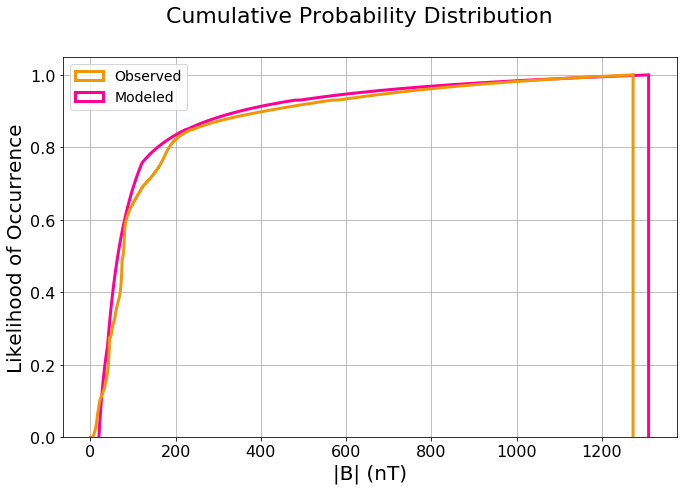

In [52]:
# can be visualized using a cumulative probability distribution

#find sample size of bins
sampleSize = len(oneSecDataFGM.loc[nanMaskB, 'B_MAG'])
numBins = np.ceil(sampleSize)

# set up figure
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Cumulative Probability Distribution', fontsize=22)

# set up gridspec
gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

# add subplot
ax1 = fig.add_subplot(gs[0,0])

# set both density and cumulative to True for the CPD
ax1.hist(oneSecDataFGM.loc[nanMaskB, 'B_MAG'],  int(numBins), density = True,
         histtype = 'step', cumulative = True, lw = 3.0, color = '#f09609', 
         label = 'Observed', zorder=20)
ax1.hist(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'], int(numBins), density = True,
         histtype = 'step', cumulative = True, lw = 3.0, color = '#ff0097',
         label = 'Modeled', zorder=10)

# set up grid and tick size
ax1.grid(zorder=0)
ax1.tick_params(labelsize = 16)

# x and y axis labels
ax1.set_xlabel('|B| (nT)', fontsize = 20)
ax1.set_ylabel('Likelihood of Occurrence', fontsize = 20)

# make legend
ax1.legend(loc='upper left', fontsize=14);

# save figure to the figures folder
plt.savefig('./Figures/CPD.png', dpi=300)

##### Skill: overall goodness of fit of the model to the observations relative to some reference model

In [53]:
# use prediction efficiency to calculate a "skill score"
numerator = sum((oneSecDataFGM.loc[nanMaskB, 'B_MAG'] - 
                 oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'])**2)
denominator = sum((oneSecDataFGM.loc[nanMaskB, 'B_MAG'] - 
                   np.mean(oneSecDataFGM.loc[nanMaskB, 'B_MAG']))**2)
predictionEfficiency = 1-(numerator / denominator)

print("The prediction efficiency of the model is: {:.2f}".format(predictionEfficiency))

The prediction efficiency of the model is: 0.98


##### Bootstrap Analysis

In [54]:
# remind myself of the length of the data
len(oneSecDataFGM)

259199

In [55]:
# remind myself of the length of the masked data
len(oneSecDataFGM[nanMaskB])

172190

In [56]:
# set number of iterations
numIterations = 500

# create dictionary of bootstrap values
bootstrapVals = {}
bootstrapVals['rValsBoot'] = np.zeros((numIterations))
bootstrapBs = np.zeros((numIterations, len(oneSecDataFGM[nanMaskB])))
bootstrapPos = np.zeros((numIterations, len(oneSecDataFGM[nanMaskB])))

# for loop to do the bootstrap analysis
for i in range(numIterations):
    bootData = oneSecDataFGM
    bootData = bootData[nanMaskB]
    # resample with replacement
    reSampled = bootData.sample(frac=1, replace=True)
    # grab the position magnitudes from the resampled dataset
    posVals = reSampled.loc[nanMaskB, 'POS_MAG']
    # grab the lambda values
    lambdaVals = reSampled.loc[nanMaskB, 'LAMBDA']
    
    # make the fit
    bootB = ((B0 / (posVals**3)) * np.sqrt(1 + 3 * (np.sin(lambdaVals))**2)) #T
    # convert from T to nT
    bootB = np.absolute(bootB) * 10**9 #nT
    
    # calculate the correlation coefficient matrix
    bootMatrixR = np.corrcoef(bootB,
                              reSampled.loc[nanMaskB, 'B_MAG'])
    # get the one value we care about from the matrix
    bootstrapVals['rValsBoot'][i] = bootMatrixR[0,1]
    
    # save this iteration's data
    bootstrapBs[i, :] = bootB
    bootstrapPos[i, :] = posVals
    
# print out the final values
print("The mean correlation coefficient is {:.2f} with  a standard deviation of {:.5f}".format(
      np.mean(bootstrapVals['rValsBoot']),
      np.std(bootstrapVals['rValsBoot'], ddof=1)))

The mean correlation coefficient is 0.99 with  a standard deviation of 0.00004


In [57]:
# see what kinds of values I have for the bootstrap B
print(bootstrapBs)

[[ 127.50131737   91.55797698  189.08272062 ...   96.42897013
    81.10869721  115.12970526]
 [  79.56950828   34.0478202    93.1992145  ...   22.29489703
    25.74026531  278.03401715]
 [ 103.02582744   91.30810321 1043.92396001 ...  115.46025269
    77.612496     57.18492067]
 ...
 [ 422.46554476  213.74855011   41.85586848 ...   21.59589972
    24.15402562   52.24643746]
 [ 633.66847469   40.86084631   59.42828013 ...   20.52171555
    30.11522706   68.84821499]
 [  96.5128794    31.25293324   44.01152198 ...  177.13165195
    49.24719165   70.58497408]]


In [58]:
# quick look to see what the resampled dataframe looks like
print(reSampled)

                              DATETIME   MSEC     B_X     B_Y     B_Z  \
DATETIME                                                                
2017-10-25 13:46:36  2017 298 13 46 36  451.0  -65.51  113.76   51.02   
2017-10-23 08:11:43   2017 296 8 11 43  442.0    9.87   42.30   -2.79   
2017-10-23 13:16:27  2017 296 13 16 27  544.0   -5.54  -47.34   -5.57   
2017-10-25 01:47:27   2017 298 1 47 27  505.0 -621.29 -286.72  425.25   
2017-10-23 21:36:16  2017 296 21 36 16  507.0   42.89  -31.69  -21.39   
2017-10-23 20:47:22  2017 296 20 47 22  510.0   44.98   -9.29  -18.42   
2017-10-23 22:41:43  2017 296 22 41 43  502.0   20.81  -73.79  -22.46   
2017-10-23 17:36:34  2017 296 17 36 34  525.0   -8.28   72.70   -9.62   
2017-10-23 11:16:23  2017 296 11 16 23  553.0   13.54   -5.07   -8.61   
2017-10-25 21:32:15  2017 298 21 32 15  542.0  -69.45  -25.95   26.52   
2017-10-25 09:32:29   2017 298 9 32 29  470.0   34.67 -174.44   57.55   
2017-10-23 05:04:43    2017 296 5 4 43  456.0  -39.

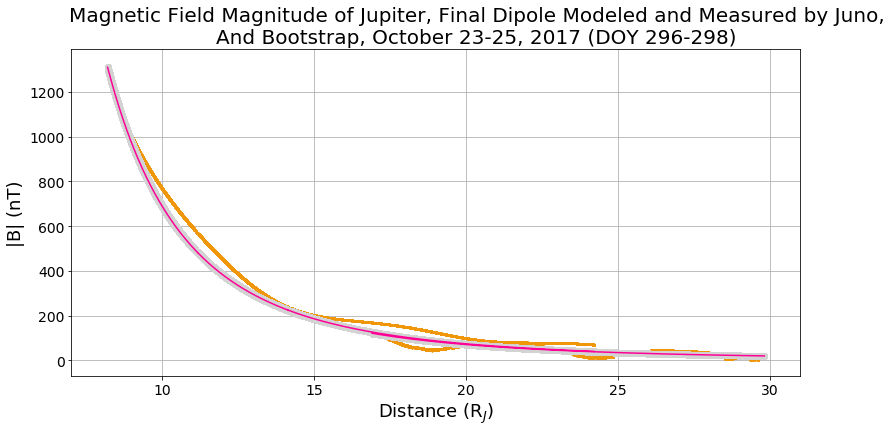

In [59]:
# plot the boot strap with the model
# set up figure
fig = plt.figure(figsize=(15, 6))
fig.suptitle('Magnetic Field Magnitude of Jupiter, Final Dipole Modeled and Measured by Juno,' +
             '\nAnd Bootstrap, October 23-25, 2017 (DOY 296-298)', fontsize=20)

# set up the grid spec
gs = plt.GridSpec(1, 1, hspace=0.1, wspace=0.0, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])

# plot both the model and the calculated magnitude of the magnetic field from the data
ax1.plot(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MODEL_FINAL'], color='#ff0097',
         label='Model Final 4.7G', linewidth=1.5, zorder=25)
ax1.scatter(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=1.0, zorder=10)

# because I have so many data points, this part takes super long to run (~30 minutes)
# to the naked eye, it looks identical to when I just plot the first 10 iterations
# In my written report, I'll show the results of this but for here I'm just going to
# leave it commented out
# plot the bootstraps
#for i in range(numIterations):
#    ax1.scatter(bootstrapPos[i, :], bootstrapBs[i, :], color='#d3d3d3',
#            zorder=25)

# plot just the first 10 bootstrap iterations
for i in range(10):
    ax1.scatter(bootstrapPos[i, :], bootstrapBs[i, :], color='#d3d3d3',
            zorder=25)

# add a grid
ax1.grid()

# set labels and increase size of fonts
ax1.set_xlabel('Distance (R$_{J}$)', fontsize = 18)
ax1.set_ylabel('|B| (nT)', fontsize = 18)
ax1.tick_params(labelsize = 14)

# save figure to figures folder
plt.savefig('./Figures/Bootstrap.png', dpi=300)

# save for the full bootstrap
#plt.savefig('./Figures/BootstrapFull.png', dpi=300)

The number of bins for the histogram is: 23.0
Skew: 0.1, Kurtosis: 3.0, Standard Dev: 0.0, Mean: 1.0


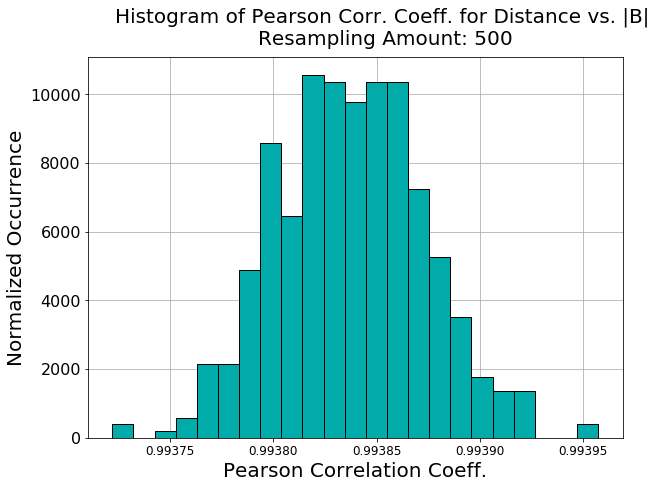

In [60]:
# what does the histogram of the r-values look like?

# set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Pearson Corr. Coeff. for Distance vs. |B| \n' + 
             'Resampling Amount: {}'.format(numIterations), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

# add subplot
ax1 = fig.add_subplot(gs[0,0])

# calculate using the general rule of thumb - 
# minimum as the sqrt(sampleSize)
sampleSize = len(bootstrapVals['rValsBoot'])
# round up
numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

# values is first entry, followed by number of bins, normed is the
# normalization factor, ie normalize to 1. 
# edgecolor and linewidth set up the bin edges
ax1.hist(bootstrapVals['rValsBoot'], int(numBins), density = 1, facecolor = '#00aba9', 
         edgecolor="k", zorder=20)

# set up grid
plt.grid(zorder=10)

# labels
plt.xlabel('Pearson Correlation Coeff.', fontsize = 20)
plt.ylabel('Normalized Occurrence', fontsize = 20)
# large ticks
plt.xticks(fontsize=12) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

# print out stats on the skew etc
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(bootstrapVals['rValsBoot']), 
        kurtosis(bootstrapVals['rValsBoot'], fisher = False), 
        np.std(bootstrapVals['rValsBoot'], ddof = 1), 
        np.mean(bootstrapVals['rValsBoot'])))

# save figure to figures folder
plt.savefig('./Figures/HistogramCorrCoefR.png', dpi=300)

#### Event Prediction - Classification Algorithm (and ROC curve)
There isn't really a specific threshold of an event for this model, so I'm just going to pick 20 Jupiter radii as my "event threshold" for the event prediction. At 20 Jupiter radii or closer, the magnetic field strength really starts to increase.

In [61]:
# create a new column in the dataframe for events
oneSecDataFGM['Events'] = np.zeros(len(oneSecDataFGM))

# set up event as 20 - anything below this is now an "event"
RBound = 20 #RJ
# index when position magnitude is less than the r bound
# i.e. closer to Jupier than 20 Jupiter radii
indEvent = oneSecDataFGM['POS_MAG'] < RBound
# at these indices, set Events column equal to zero (logical indexing)
oneSecDataFGM.loc[indEvent, 'Events'] = 1

In [62]:
# set up a prediction
oneSecDataFGM['Predict'] = np.zeros(len(oneSecDataFGM))

# set up a boundary above which we want a binary value
BBound = 100 #nT
indPredict = oneSecDataFGM['B_MAG'] > BBound
oneSecDataFGM.loc[indPredict, 'Predict'] = 1

In [63]:
# this is what we imported from the sklearn module 
# to make the confusion matrix/contingency table

# the .ravel command "unwraps" this - 
N, F, M, H = confusion_matrix(oneSecDataFGM['Events'], oneSecDataFGM['Predict']).ravel()

print('Contingency Table:\nTrue Positives: {}'.format(H), 'False Positives: {}'.format(F), '\n' 
      'False Negatives: {}'.format(M), 'True Negatives: {}'.format(N))

Contingency Table:
True Positives: 61074 False Positives: 0 
False Negatives: 15531 True Negatives: 182594


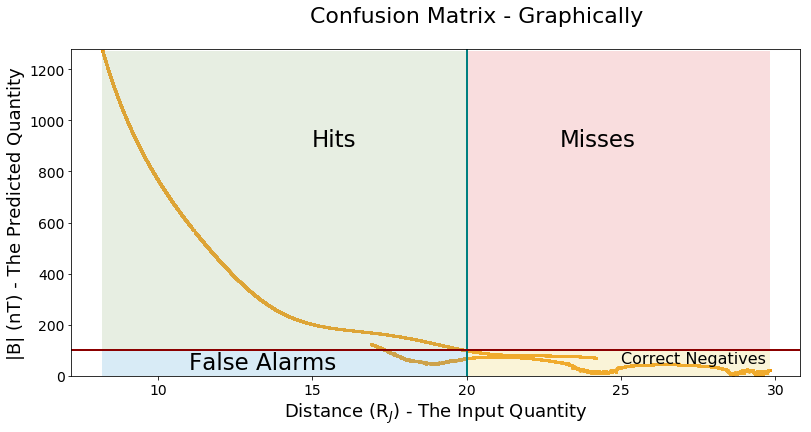

In [64]:
# set up figure size
fig = plt.figure(figsize=(15, 6))

# add title
fig.suptitle('Confusion Matrix - Graphically', fontsize = 22)

# create grid spec and axis
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.8)

ax = fig.add_subplot(gs[:,:])
# plot the data as a scatter plot
ax.scatter(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MAG'], s = 2, 
           color = '#f09609')

### Make rectangle patches for the 4 categories ###

# False Alarms
# rectangle commands work by adding the xy bottom left of the rectangle to the width and height
# Rectangle((X, Y), width, height)
ax.add_patch(Rectangle((np.nanmin(oneSecDataFGM['POS_MAG']), 
                        np.nanmin(oneSecDataFGM['B_MAG'])),
                        RBound - np.nanmin(oneSecDataFGM['POS_MAG']),
                        BBound, alpha=0.3, facecolor = "#7fc0e4"))

# Hits
ax.add_patch(Rectangle((np.nanmin(oneSecDataFGM['POS_MAG']), BBound), 
                       RBound - np.nanmin(oneSecDataFGM['POS_MAG']),
                       np.nanmax(oneSecDataFGM['B_MAG']) - BBound, 
                       alpha=0.3, facecolor = "#b2c79f"))
# Misses
ax.add_patch(Rectangle((RBound, BBound), 
                       np.nanmax(oneSecDataFGM['POS_MAG']) - RBound,
                       np.nanmax(oneSecDataFGM['B_MAG']) - BBound,
                       alpha=0.3, facecolor = "#ed9192"))
# Correct Negatives
ax.add_patch(Rectangle((RBound, np.nanmin(oneSecDataFGM['B_MAG'])), 
                       np.nanmax(oneSecDataFGM['POS_MAG']) - RBound, BBound, 
                       alpha=0.3, facecolor = "#f1dc81"))

# draw boundary lines
ax.axvline(RBound, color = '#007f80', lw = 2.0)
ax.axhline(BBound, color = '#8b0000', lw = 2.0)

# set labels
ax.set_xlabel('Distance (R$_{J}$) - The Input Quantity', fontsize = 18)
ax.set_ylabel('|B| (nT) - The Predicted Quantity', fontsize = 18)
ax.tick_params(labelsize = 14)

# setting nice boundaries
ax.set_xlim([np.nanmin(oneSecDataFGM['POS_MAG'])-1, np.nanmax(oneSecDataFGM['POS_MAG'])+1])
ax.set_ylim([np.nanmin(oneSecDataFGM['B_MAG']), np.nanmax(oneSecDataFGM['B_MAG'])+5])

# add writing to the graph to label each section
ax.annotate('False Alarms', xy = (RBound - 9, BBound - 75), fontsize = 23)
ax.annotate('Correct Negatives', xy = (RBound + 5, BBound - 50), fontsize = 16)
ax.annotate('Hits', xy = (RBound - 5, BBound + 800), fontsize = 23)
ax.annotate('Misses', xy = (RBound + 3, BBound + 800), fontsize = 23)

# save figure to figures folder
plt.savefig('./Figures/ConfusionMatrix.png', dpi=300)

##### Big 6 Metrics for Event Detection
###### Accuracy: how close the model is to the data
Proportion Correct (PC) and Critical Success Index (CSI). CSI doesn't take into accound correct negatives. It is most useful when the number of data points are large (which is true in this case).

In [65]:
# proportion correct PC
# pc = (hits+correct negatives)/sum(all)
pc = (H + N) / (H + M + F + N)
print('Proportion Correct (PC) = {:.2f}'.format(pc))
print('Percent Correct = {:.2f}%'.format(pc*100))

Proportion Correct (PC) = 0.94
Percent Correct = 94.01%


In [66]:
# critical success index (CSI)
#csi = hits/(H+M+F)
csi = H / (H + M + F)
print('Critical Success Index (CSI) = {:.2f}'.format(csi))

Critical Success Index (CSI) = 0.80


###### Bias: discrepancy between the model to the data
Frequency Bias (FB). This is a measure of the symmetry of the table.

In [67]:
# fb = (H+M)/(H+F)
fb = (H + M) / (H + F)
print('Frequency Bias (FB) = {:.2f}'.format(fb))

Frequency Bias (FB) = 1.25


###### Association: how well the model and data move together
Odds Ratio Skill Score (ORSS).

In [68]:
# first need odds ratio
# or = (H*N)/(M*F)
oddsRatio = (H * N) / (M * F)
print('Denominatior of OR = {}'.format(M * F))
print('Odds Ratio (OR) = {}'.format(oddsRatio))
# then ORSS
# orss = (or-1)/(or+1)
orss = (oddsRatio - 1) / (oddsRatio + 1)
print('Odds Ratio Skill Score (ORSS) = {:.2f}'.format(orss))

Denominatior of OR = 0
Odds Ratio (OR) = inf
Odds Ratio Skill Score (ORSS) = nan


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


Because the threshold I chose had zero misses, the denominator of the OR calculation is zero. Thus, both the odds ratio and the odds ratio skill score cannot be calculated at this threshold.

###### Discrimination: how well the model can sort data into categories
Probability of detection (POD) and probability of false detection (POFD). These assess each side of the threshold.

In [69]:
# POD
# pod = H/(H+M)
pod = H / (H + M)
print('Probability of Detection (POD) = {:.2f}'.format(pod))

# pofd = F/(F+N)
pofd = F / (F + N)
print('Probability of False Detection (POFD) = {:.2f}'.format(pofd))

Probability of Detection (POD) = 0.80
Probability of False Detection (POFD) = 0.00


###### Extremes: how well the model gets the outliers in the data
Symmetric Extreme Dependency Score (SEDS). Goodness of fit that preferentially weights the maxima and minima.

In [70]:
# SEDS
# seds = (ln((H+F)/(H+F+M+N)) + ln((H+M)/(H+F+M+N))) / (ln(H/(H+F+M+N))) -1
# use numpy.log for natural log
seds = (np.log((H+F)/(H+F+M+N)) + np.log((H+M)/(H+F+M+N))) / (np.log(H/(H+F+M+N))) - 1
print('Symmetric Extreme Dependency Score (SEDS) = {:.2f}'.format(seds))

Symmetric Extreme Dependency Score (SEDS) = 0.84


###### Skill: goodness of fit relative to a reference model
Heidke Skill Score (HSS) and Gilbert Skill Score (GSS). GSS is helpful if contingency table is dominated by many correct negatives. This is true for this data.

In [71]:
# HSS
# hss = (2*((H*N)-(M*F))) / (((H+M)*(M+N))+(H+F)*(F+N))
hss = (2*((H*N)-(M*F))) / (((H+M)*(M+N))+(H+F)*(F+N))
print('Heidke Skill Score (HSS) = {:.2f}'.format(hss))

# GSS
# gss = (H-Href) / (H-Href+M+F)
# where
# Href = ((H+F)*(H+M)) / (H+F+M+N)
Href = ((H+F)*(H+M)) / (H+F+M+N)
gss = (H-Href) / (H-Href+M+F)
print('Gilbert Skill Score (GSS) = {:.2f}'.format(gss))

Heidke Skill Score (HSS) = 0.85
Gilbert Skill Score (GSS) = 0.73


##### ROC Curve

In [72]:
# make a "moving threshold"
thresholdVals = np.arange(0, 32, 2)

# set up a dictionary to capture output from performance calculations
perfValues = {}

perfValues['POD'] = np.zeros(len(thresholdVals))
perfValues['POFD'] = np.zeros(len(thresholdVals))

# run through threshold values
for i, t in enumerate(thresholdVals):
    print("Running for threshold value of Jupiter radii of {}, index {}".format(t, i))
    
    # set up the prediction each time
    oneSecDataFGM['Predict'] = np.zeros(len(oneSecDataFGM))
    
    indPredict = oneSecDataFGM['POS_MAG'] > t
    oneSecDataFGM.loc[indPredict, 'Predict'] = 1
    
    # caclulate the confusion matrix values
    N, F, M, H = confusion_matrix(oneSecDataFGM['Events'], oneSecDataFGM['Predict']).ravel()
    
    # find POD, PDF
    perfValues['POD'][i] = H / (H + M)
    
    perfValues['POFD'][i] = F / (F + N)
    
    print('POD = {:.2f} & POFD = {:.2f}'.format(perfValues['POD'][i], perfValues['POFD'][i]))

Running for threshold value of Jupiter radii of 0, index 0
POD = 1.00 & POFD = 0.52
Running for threshold value of Jupiter radii of 2, index 1
POD = 1.00 & POFD = 0.52
Running for threshold value of Jupiter radii of 4, index 2
POD = 1.00 & POFD = 0.52
Running for threshold value of Jupiter radii of 6, index 3
POD = 1.00 & POFD = 0.52
Running for threshold value of Jupiter radii of 8, index 4
POD = 1.00 & POFD = 0.52
Running for threshold value of Jupiter radii of 10, index 5
POD = 0.91 & POFD = 0.52
Running for threshold value of Jupiter radii of 12, index 6
POD = 0.79 & POFD = 0.52
Running for threshold value of Jupiter radii of 14, index 7
POD = 0.67 & POFD = 0.52
Running for threshold value of Jupiter radii of 16, index 8
POD = 0.54 & POFD = 0.52
Running for threshold value of Jupiter radii of 18, index 9
POD = 0.31 & POFD = 0.52
Running for threshold value of Jupiter radii of 20, index 10
POD = 0.00 & POFD = 0.52
Running for threshold value of Jupiter radii of 22, index 11
POD = 0.

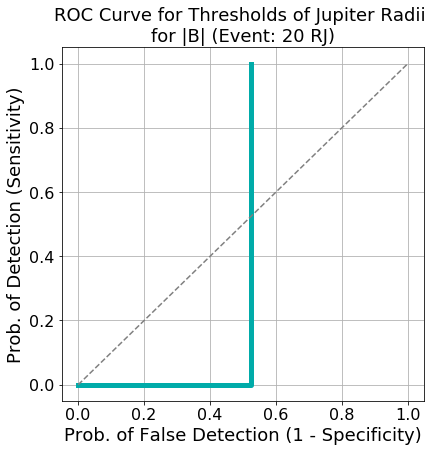

In [73]:
# plot the ROC curve
# set up figure size
fig = plt.figure(figsize=(6.5, 6.5))

# make grid spec
gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

# add subplot
ax1 = fig.add_subplot(gs[0,0])

ax1.set_title('ROC Curve for Thresholds of Jupiter Radii \n' + 
             'for |B| (Event: {} RJ)'.format(RBound), 
             fontsize=18)

# set up titles for axis
ax1.set_xlabel('Prob. of False Detection (1 - Specificity)', fontsize = 18)
ax1.set_ylabel('Prob. of Detection (Sensitivity)', fontsize = 18)

# plot values
ax1.plot(perfValues['POFD'], perfValues['POD'],  color = '#00aba9', lw = 5.0)

# set up "random performance line"
ax1.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), ls = 'dashed', color = 'grey')
# set up grid
ax1.grid()

# set nice labelsizes
ax1.tick_params(labelsize = 16)

# save figure
plt.savefig('./Figures/ROCcurve.png', dpi=300)

### Step 3E: Visualization not demonstrated in class
I will be plotting Juno's location in a 3D plot.

In [74]:
# remind myself of the last data point in the time series
# so I can put a marker on it when I plot
oneSecDataFGM.tail()

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z,POS_X_RJ,POS_Y_RJ,...,POS_MAG,THETA,LAMBDA,B_MODEL_ORIG,B_MODEL_TEST1,B_MODEL_TEST2,B_MODEL_TEST3,B_MODEL_FINAL,Events,Predict
DATETIME,,,,,,,,,,,,,,,,,,,,,
2017-10-25 23:59:54,2017 298 23 59 54,531.0,-18.11,64.53,22.23,605100.465,-1322405.208,-937417.886,8.463891,-18.497247,...,24.201561,1.979303,-0.408506,36.821219,35.108604,38.533834,40.246448,40.246448,0.0,0.0
2017-10-25 23:59:55,2017 298 23 59 55,531.0,-18.06,64.51,22.21,604871.947,-1322520.887,-937421.442,8.460694,-18.498865,...,24.201707,1.979301,-0.408505,36.820513,35.107931,38.533095,40.245677,40.245677,0.0,0.0
2017-10-25 23:59:56,2017 298 23 59 56,531.0,-18.05,64.54,22.20,604643.408,-1322636.527,-937424.999,8.457497,-18.500483,...,24.201853,1.979300,-0.408504,36.819807,35.107257,38.532356,40.244905,40.244905,0.0,0.0
2017-10-25 23:59:57,2017 298 23 59 57,531.0,-18.02,64.51,22.16,604414.847,-1322752.127,-937428.555,8.454300,-18.502100,...,24.201999,1.979298,-0.408502,36.819101,35.106584,38.531617,40.244133,40.244133,0.0,0.0
2017-10-25 23:59:58,2017 298 23 59 58,531.0,-18.02,64.49,22.20,604186.264,-1322867.687,-937432.111,8.451103,-18.503716,...,24.202145,1.979297,-0.408501,36.818395,35.105911,38.530878,40.243362,40.243362,0.0,0.0


In [75]:
# make sure I am indexing correctly for the first
print(oneSecDataFGM.loc[dt.datetime(2017, 10, 23, 0, 0, 0)])

DATETIME         2017 296 0 0 0
MSEC                        666
B_X                       20.76
B_Y                        5.09
B_Z                        0.69
POS_X               1.94032e+06
POS_Y                    831089
POS_Z                    293828
POS_X_RJ                27.1404
POS_Y_RJ                11.6249
POS_Z_RJ                4.10995
B_MAG                    21.386
B_MAG_ERROR                0.05
POS_MAG                 29.8099
THETA                   1.26842
LAMBDA                 0.302373
B_MODEL_ORIG            18.2645
B_MODEL_TEST1            17.415
B_MODEL_TEST2            19.114
B_MODEL_TEST3           19.9636
B_MODEL_FINAL           19.9636
Events                        0
Predict                       0
Name: 2017-10-23 00:00:00, dtype: object


In [76]:
# and last datapoint of the time series
print(oneSecDataFGM.loc[dt.datetime(2017, 10, 25, 23, 59, 58)])

DATETIME         2017 298 23 59 58
MSEC                           531
B_X                         -18.02
B_Y                          64.49
B_Z                           22.2
POS_X                       604186
POS_Y                 -1.32287e+06
POS_Z                      -937432
POS_X_RJ                    8.4511
POS_Y_RJ                  -18.5037
POS_Z_RJ                  -13.1124
B_MAG                      70.5445
B_MAG_ERROR                   0.05
POS_MAG                    24.2021
THETA                       1.9793
LAMBDA                   -0.408501
B_MODEL_ORIG               36.8184
B_MODEL_TEST1              35.1059
B_MODEL_TEST2              38.5309
B_MODEL_TEST3              40.2434
B_MODEL_FINAL              40.2434
Events                           0
Predict                          0
Name: 2017-10-25 23:59:58, dtype: object


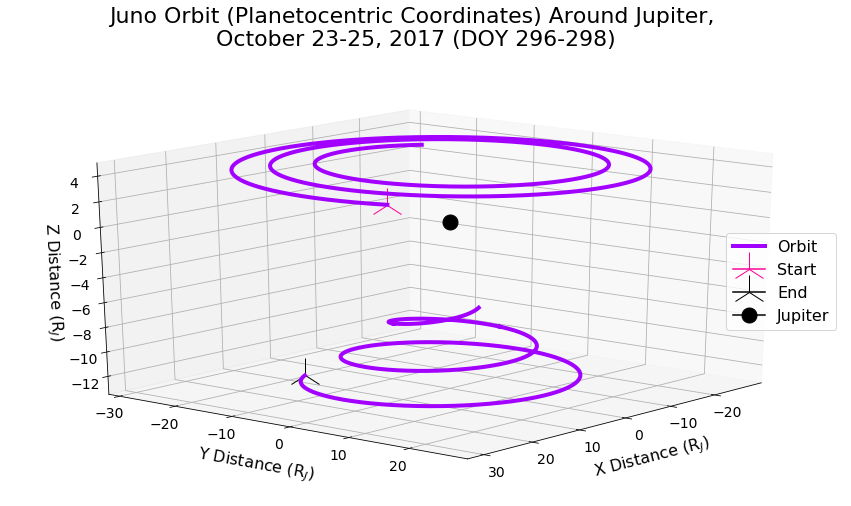

In [77]:
### 3D plot in Planetocentric Coordinates ###

# initialize figure
fig = plt.figure(figsize=(15, 8))
# add subplot
# initialize as a 3D projection
ax = fig.add_subplot(111, projection='3d')
# set title
fig.suptitle('Juno Orbit (Planetocentric Coordinates) Around Jupiter,\n October 23-25, 2017 (DOY 296-298)',
             fontsize=22)

# plot x, y, z
# because ax is initialized as a 3D plot, I can now just use the plot
# command like normal, just with the added z component
ax.plot(oneSecDataFGM['POS_X_RJ'], oneSecDataFGM['POS_Y_RJ'],
        oneSecDataFGM['POS_Z_RJ'], lw=4.0, color='#a200ff', zorder=20, 
        label='Orbit')

# plot a marker at the start and end of the orbit
# start
ax.plot([oneSecDataFGM.loc[dt.datetime(2017, 10, 23, 0, 0, 0), 'POS_X_RJ']],
        [oneSecDataFGM.loc[dt.datetime(2017, 10, 23, 0, 0, 0), 'POS_Y_RJ']],
        [oneSecDataFGM.loc[dt.datetime(2017, 10, 23, 0, 0, 0), 'POS_Z_RJ']],
        color='#ff0097', marker='2', markersize=35,
        label='Start') #marker 2 looks like Juno's solar panels!
# end
ax.plot([oneSecDataFGM.loc[dt.datetime(2017, 10, 25, 23, 59, 58), 'POS_X_RJ']],
        [oneSecDataFGM.loc[dt.datetime(2017, 10, 25, 23, 59, 58), 'POS_Y_RJ']],
        [oneSecDataFGM.loc[dt.datetime(2017, 10, 25, 23, 59, 58), 'POS_Z_RJ']],
        color='k', marker='2', markersize=35, label='End')

# plot a marker where Jupiter is (at 0,0,0 of the planetocentric coordinate system)
ax.plot([0], [0], [0], color='k', marker = 'o',  markersize = 15, zorder=0,
        label='Jupiter')

# set axis labels
# the axis labels on 3D plots are very squished into the tick labels for some reason
# adding new lines helps stop the labels from overlapping
ax.set_xlabel('\n\nX Distance (R$_{J}$)', fontsize=16)
ax.set_ylabel('\n\nY Distance (R$_{J}$)', fontsize=16)
ax.set_zlabel('Z Distance (R$_{J}$)', fontsize=16)

# make tick labels bigger
ax.tick_params(labelsize = 14)

# change the viewing angle (this was just a lot of trial and error)
ax.view_init(elev=20., azim=40)

# add legend
ax.legend(loc='center right', prop={'size':16})

# save figure
plt.savefig('./Figures/3DOrbitPlanetocentric.png', dpi=300)

In [78]:
# I think it would also be useful to plot this in the Sun-State (SS) coordinate system
# I already modified the external functions package to read the planetocentric data
# Now, I'll go back and make another function to read in the SS data I have

# reload the external functions package
importlib.reload(extfunc)

# print out the help on extfunc
help(extfunc)

Help on module externalfunctions:

NAME
    externalfunctions - externalfunctions.py

DESCRIPTION
    Comment Block for external modules should have: 
    
    Name and Date: 
    - Written on 1/29/2018 for CLaSP 405 by Lab TA A. Azari. 
    
    Purpose:
    - To create a module with helpful reading file functions and 
    magnetic field data analysis for Lab 4.

FUNCTIONS
    addQuadrature(X, Y, Z)
        Calculates a quadrature sum of three values. 
        Formula as np.sqrt(x^2 + y^2 + z^2)
        Useful when calculating the  magnitude of X, Y, Z vector components. 
        
        Inputs:
        - X, array or single value (numpy etc).
        - Y, array or single value (numpy etc).
        - Z, array or single value (numpy etc).
        
        Outputs:
        - magnitude, array or single value (numpy etc) of magnitude of components.
    
    convertJupiterR(columns)
        Takes in a dataframe subset and converts
        into radii of Jupiter by creating new columns.
    

In [79]:
# now I can use readFGM_SS to read in my sun state data
# set variables for the first day I want to read in
yearVal = '2017'
doyVal = '296'

# read in the data for DOY 296
mag296SS = extfunc.readFGM_SS(yearVal, doyVal)

# print the head of the file to make sure it looks okay
mag296SS.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2017-10-23 00:00:00,2017 296 0 0 0,666,-14.83,-15.40,-0.29,-1208367.620,-1743226.315,207112.824
2017-10-23 00:00:01,2017 296 0 0 1,478,-14.80,-15.40,-0.28,-1208363.474,-1743219.999,207113.740
2017-10-23 00:00:02,2017 296 0 0 2,478,-14.81,-15.45,-0.26,-1208358.371,-1743212.226,207114.866
2017-10-23 00:00:03,2017 296 0 0 3,478,-14.81,-15.55,-0.30,-1208353.268,-1743204.452,207115.992
2017-10-23 00:00:04,2017 296 0 0 4,478,-14.79,-15.62,-0.36,-1208348.165,-1743196.679,207117.119
2017-10-23 00:00:05,2017 296 0 0 5,478,-14.79,-15.67,-0.34,-1208343.062,-1743188.905,207118.245
2017-10-23 00:00:06,2017 296 0 0 6,478,-14.80,-15.65,-0.36,-1208337.958,-1743181.131,207119.372
2017-10-23 00:00:07,2017 296 0 0 7,478,-14.84,-15.66,-0.32,-1208332.855,-1743173.358,207120.498
2017-10-23 00:00:08,2017 296 0 0 8,478,-14.87,-15.66,-0.24,-1208327.752,-1743165.584,207121.625


In [80]:
# DOY 296 looks good! onto the next day...

# now read in the other day I have, yearVal is still 2017
doyVal = '298'

# read in DOY 298
mag298SS = extfunc.readFGM_SS(yearVal, doyVal)

# print the head of the file to make sure it looks okay
mag298SS.head(n=10)

,DATETIME,MSEC,B_X,B_Y,B_Z,POS_X,POS_Y,POS_Z
DATETIME,,,,,,,,
2017-10-25 00:00:00,2017 298 0 0 0,576,409.60,980.97,700.45,-153287.965,-309549.277,-473939.459
2017-10-25 00:00:01,2017 298 0 0 1,513,409.24,981.25,700.29,-153296.024,-309562.910,-473949.535
2017-10-25 00:00:02,2017 298 0 0 2,513,408.85,981.50,700.22,-153304.621,-309577.451,-473960.282
2017-10-25 00:00:03,2017 298 0 0 3,513,408.59,981.61,700.14,-153313.217,-309591.993,-473971.029
2017-10-25 00:00:04,2017 298 0 0 4,513,408.28,981.72,700.17,-153321.814,-309606.534,-473981.776
2017-10-25 00:00:05,2017 298 0 0 5,513,408.12,981.70,700.24,-153330.410,-309621.075,-473992.522
2017-10-25 00:00:06,2017 298 0 0 6,513,408.03,981.56,700.27,-153339.007,-309635.616,-474003.269
2017-10-25 00:00:07,2017 298 0 0 7,513,408.02,981.32,700.36,-153347.603,-309650.156,-474014.014
2017-10-25 00:00:08,2017 298 0 0 8,513,408.15,981.02,700.42,-153356.199,-309664.697,-474024.760


In [81]:
# check the lengths of each dataset
print('Length of mag 296 SS = ', len(mag296SS))
print('Length of mag 298 SS = ', len(mag298SS))
print('The size 24x60x60 = ', 24*60*60)

Length of mag 296 SS =  86400
Length of mag 298 SS =  85790
The size 24x60x60 =  86400


In [82]:
# append the two datasets together before resampling

dataFGMSS = mag296SS.append(mag298SS)

print(dataFGMSS)

                              DATETIME  MSEC    B_X    B_Y    B_Z  \
DATETIME                                                            
2017-10-23 00:00:00     2017 296 0 0 0   666 -14.83 -15.40  -0.29   
2017-10-23 00:00:01     2017 296 0 0 1   478 -14.80 -15.40  -0.28   
2017-10-23 00:00:02     2017 296 0 0 2   478 -14.81 -15.45  -0.26   
2017-10-23 00:00:03     2017 296 0 0 3   478 -14.81 -15.55  -0.30   
2017-10-23 00:00:04     2017 296 0 0 4   478 -14.79 -15.62  -0.36   
2017-10-23 00:00:05     2017 296 0 0 5   478 -14.79 -15.67  -0.34   
2017-10-23 00:00:06     2017 296 0 0 6   478 -14.80 -15.65  -0.36   
2017-10-23 00:00:07     2017 296 0 0 7   478 -14.84 -15.66  -0.32   
2017-10-23 00:00:08     2017 296 0 0 8   478 -14.87 -15.66  -0.24   
2017-10-23 00:00:09     2017 296 0 0 9   478 -14.90 -15.64  -0.32   
2017-10-23 00:00:10    2017 296 0 0 10   478 -14.94 -15.63  -0.37   
2017-10-23 00:00:11    2017 296 0 0 11   478 -14.92 -15.66  -0.39   
2017-10-23 00:00:12    2017 296 0 

In [83]:
# first, I'll convert the X, Y, and Z positions into Jupiter radii so they are more intuitive
# pass in columns to convert
convertedCols = extfunc.convertJupiterR(dataFGMSS[['POS_X', 'POS_Y', 'POS_Z']])

# create and assign new columns here - 
dataFGMSS[['POS_X_RJ', 'POS_Y_RJ', 'POS_Z_RJ']] = convertedCols

# take a look 
print(dataFGMSS[['POS_X_RJ', 'POS_X', 'POS_Y_RJ', 'POS_Y', 'POS_Z_RJ', 'POS_Z']].head(n=10))

                      POS_X_RJ        POS_X   POS_Y_RJ        POS_Y  POS_Z_RJ  \
DATETIME                                                                        
2017-10-23 00:00:00 -16.902138 -1208367.620 -24.383516 -1743226.315  2.897007   
2017-10-23 00:00:01 -16.902080 -1208363.474 -24.383428 -1743219.999  2.897020   
2017-10-23 00:00:02 -16.902008 -1208358.371 -24.383319 -1743212.226  2.897036   
2017-10-23 00:00:03 -16.901937 -1208353.268 -24.383210 -1743204.452  2.897051   
2017-10-23 00:00:04 -16.901865 -1208348.165 -24.383101 -1743196.679  2.897067   
2017-10-23 00:00:05 -16.901794 -1208343.062 -24.382993 -1743188.905  2.897083   
2017-10-23 00:00:06 -16.901723 -1208337.958 -24.382884 -1743181.131  2.897099   
2017-10-23 00:00:07 -16.901651 -1208332.855 -24.382775 -1743173.358  2.897114   
2017-10-23 00:00:08 -16.901580 -1208327.752 -24.382666 -1743165.584  2.897130   
2017-10-23 00:00:09 -16.901509 -1208322.649 -24.382558 -1743157.810  2.897146   

                          P

In [84]:
# this command resamples our array at the 1S frequency ie it adds in values where there are 
# missing values and fills with NAN
oneSecDataFGMSS = (dataFGMSS.resample('1S').asfreq())

# now check the lengths again
print(len(oneSecDataFGMSS), (24*3*60*60), len(dataFGMSS))

259199 259200 172190


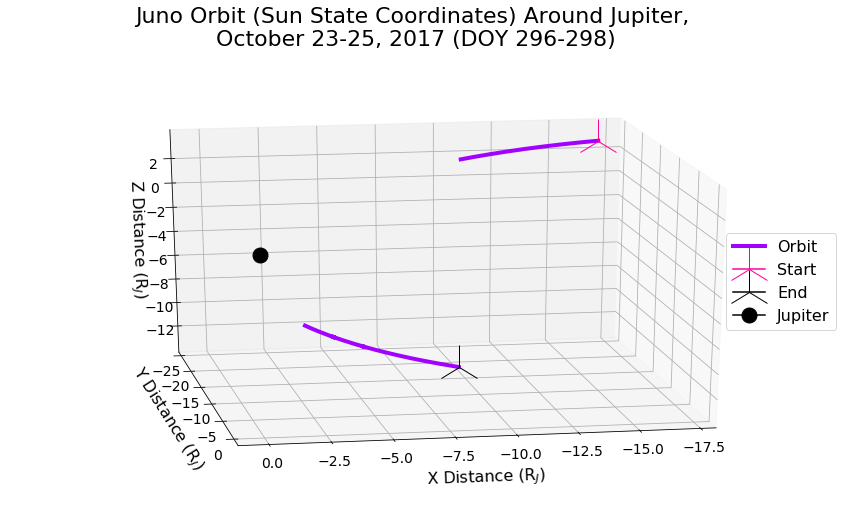

In [85]:
# this is the same as the other file where the last second of data on DOY 298 is missing
# now, I can plot the Juno position in Sun State coordinates in 3D

### 3D plot in Sun State Coordinates ###
# initialize figure
fig = plt.figure(figsize=(15, 8))
# add subplot
# initialize as a 3D projection
ax = fig.add_subplot(111, projection='3d')
# set title
fig.suptitle('Juno Orbit (Sun State Coordinates) Around Jupiter,\n October 23-25, 2017 (DOY 296-298)',
             fontsize=22)

# plot x, y, z
# because ax is initialized as a 3D plot, I can now just use the plot
# command like normal, just with the added z component
ax.plot(oneSecDataFGMSS['POS_X_RJ'], oneSecDataFGMSS['POS_Y_RJ'],
        oneSecDataFGMSS['POS_Z_RJ'], lw=4.0, color='#a200ff', zorder=20,
        label='Orbit')

# plot a marker at the start and end of the orbit
# start
ax.plot([oneSecDataFGMSS.loc[dt.datetime(2017, 10, 23, 0, 0, 0), 'POS_X_RJ']],
        [oneSecDataFGMSS.loc[dt.datetime(2017, 10, 23, 0, 0, 0), 'POS_Y_RJ']],
        [oneSecDataFGMSS.loc[dt.datetime(2017, 10, 23, 0, 0, 0), 'POS_Z_RJ']],
        color='#ff0097', marker='2', markersize=45, zorder=30,
        label='Start') #marker 2 looks like Juno's solar panels!
# end
ax.plot([oneSecDataFGMSS.loc[dt.datetime(2017, 10, 25, 23, 59, 58), 'POS_X_RJ']],
        [oneSecDataFGMSS.loc[dt.datetime(2017, 10, 25, 23, 59, 58), 'POS_Y_RJ']],
        [oneSecDataFGMSS.loc[dt.datetime(2017, 10, 25, 23, 59, 58), 'POS_Z_RJ']],
        color='k', marker='2', markersize=45, zorder=30, label='End')

# plot a marker where Jupiter is (at 0,0,0 of the sun state coordinate system)
ax.plot([0], [0], [0], color='k', marker = 'o',  markersize = 15, zorder=0,
        label='Jupiter')

# set axis labels
# the axis labels on 3D plots are very squished into the tick labels for some reason
# adding new lines helps stop the labels from overlapping
ax.set_xlabel('\n\nX Distance (R$_{J}$)', fontsize=16)
ax.set_ylabel('\nY Distance (R$_{J}$)', fontsize=16)
ax.set_zlabel('Z Distance (R$_{J}$)', fontsize=16)

# make tick labels bigger
ax.tick_params(labelsize = 14)

# add legend
ax.legend(loc='center right', prop={'size':16})

# change the viewing angle (this was just a lot of trial and error)
ax.view_init(elev=20., azim=80)

# save figure
plt.savefig('./Figures/3DOrbitSunState.png', dpi=300)

### Step 3F: Create an additional figure

In [86]:
# at the very beginning of the report, I loaded in imageData, a picture of Jupiter
# taken by Juno on perijove 9

# there should be 5 image files that are in imageData
# the function readImgFiles should have read in all 5 and stored in a dictionary called imageData
# print the keys of that dictionary
print(imageData.keys())

dict_keys(['blue', 'green', 'mapprojected', 'raw', 'red'])


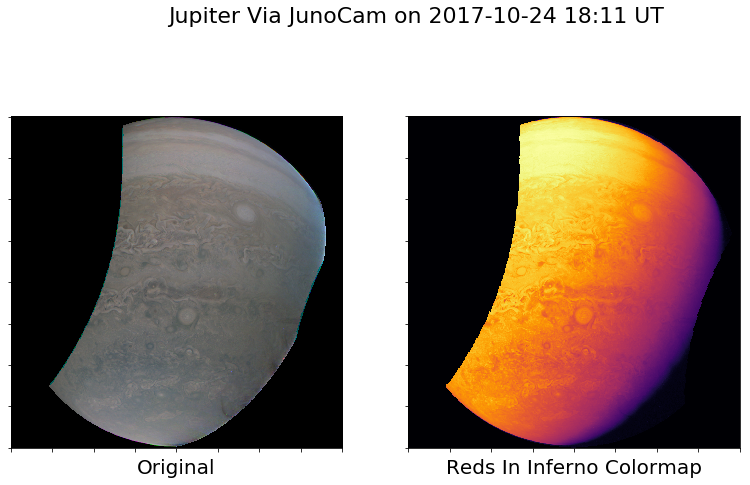

In [87]:
# plot the original image and then one with pcolormesh

# initialize figure
fig = plt.figure(figsize=(15, 8))
# add title
fig.suptitle('Jupiter Via JunoCam on 2017-10-24 18:11 UT', fontsize=22)

# set up the grid space
gs = plt.GridSpec(1, 2, hspace=0.1, wspace=0.2, right = 0.8)

# add subplots
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

# make aspect ratio into a square
ax1.set_aspect(1.0)
ax2.set_aspect(1.0)

# plot the images data
ax1.imshow(imageData['mapprojected'])
# plot the red key in the inferno color map
ax2.pcolormesh(imageData['red'], cmap='inferno')
# pcolormesh flips the y-axis, so flip it back
ax2.invert_yaxis()

# set labeling
ax1.set_xlabel('Original',   fontsize = 20)
ax2.set_xlabel('Reds In Inferno Colormap', fontsize = 20)

# setting tick parameters to null - pixel values aren't very useful or informative
ax1.set_xticklabels([]) #unmake the tick labels
ax2.set_xticklabels([])
ax1.set_yticklabels([]) #unmake the tick labels
ax2.set_yticklabels([]);

# save figure
plt.savefig('./Figures/JunoCamAugmented.png', dpi=300)

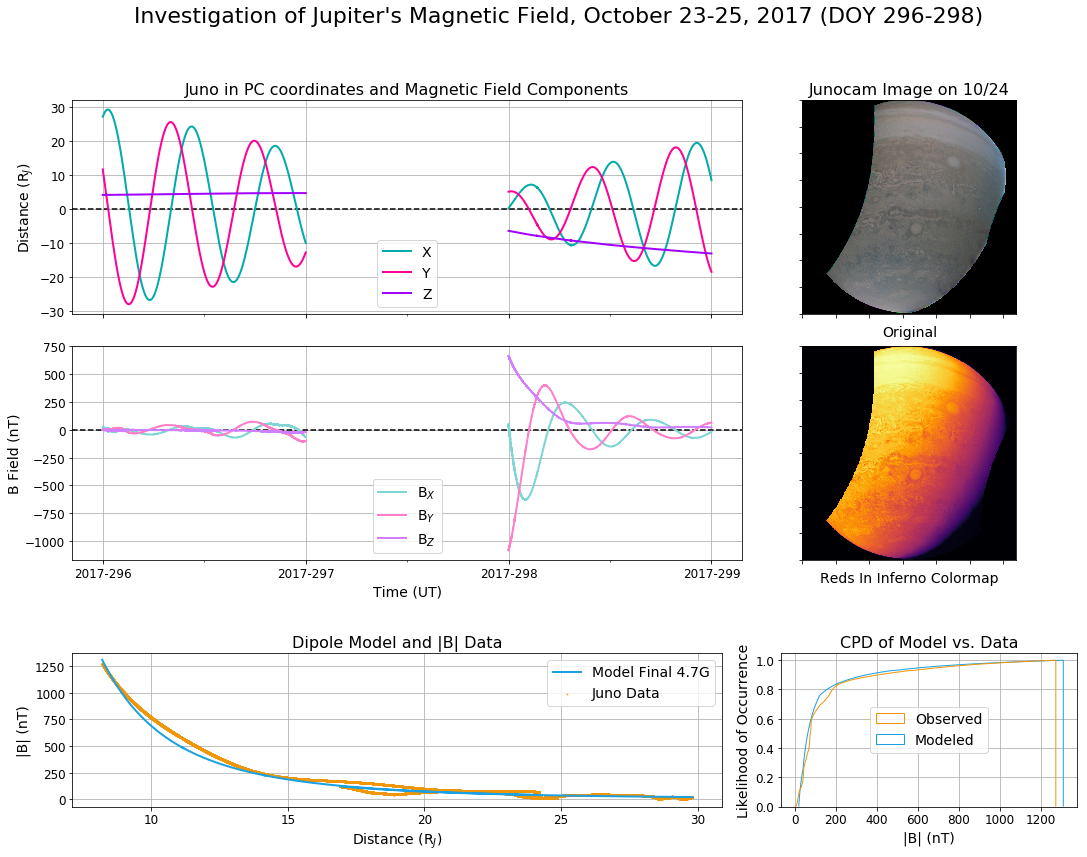

In [88]:
# now, add the augmented image to a summary plot of this project

# set up the figure 
fig = plt.figure(figsize=(18, 13))
fig.suptitle("Investigation of Jupiter's Magnetic Field, October 23-25, 2017 (DOY 296-298)",
             fontsize=22)

# set up the grid spec
gs_top = plt.GridSpec(3, 3, hspace=0.15, wspace=0.0, right = 0.9)
gs_bottom = plt.GridSpec(4, 3)

# add axes
ax1 = plt.subplot(gs_top[0, :-1])
ax2 = plt.subplot(gs_top[1, :-1])
ax3 = plt.subplot(gs_top[0, 2])
ax4 = plt.subplot(gs_top[1, 2])
ax5 = plt.subplot(gs_bottom[3, :-1])
ax6 = plt.subplot(gs_bottom[3, 2])


#### ax1 and ax2 are the PC coordinates and magnetic field components
# plot the Juno position X, Y, and Z components
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_X_RJ'], linewidth=2.0, 
         color = '#00aba9', label = 'X', zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Y_RJ'], linewidth=2.0, 
         color = '#ff0097', label = 'Y', zorder=20)
ax1.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Z_RJ'], linewidth=2.0, 
         color = '#a200ff', label = 'Z', zorder=20)

# set up horizontal line, y-label, and title for subplot 1
ax1.axhline(y=0.0, color = 'k', linestyle = '--', zorder=10)
ax1.set_ylabel('Distance (R$_{J}$)', fontsize = 14)

ax1.tick_params(labelsize = 12)
#set up the grid
ax1.grid()
ax1.set_xticklabels([])

ax1.set_title('Juno in PC coordinates and Magnetic Field Components', fontsize=16)

ax1.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax1.xaxis.set_major_locator(mdt.DayLocator())

ax2.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax2.xaxis.set_major_locator(mdt.DayLocator())
#SET FORMAT
ax2.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax2.set_xlabel('Time (UT)', fontsize = 14)
ax2.tick_params(labelsize = 12)

#set up the grid
ax2.grid()

# plot the magnetic field components
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_X'], linewidth=2.0, 
         color = '#7fd5d4', label = 'B$_{X}$', zorder=20)
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Y'], linewidth=2.0, 
         color = '#ff7fcb', label = 'B$_{Y}$', zorder=20)
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Z'], linewidth=2.0, 
         color = '#d07fff', label = 'B$_{Z}$', zorder=20)

ax2.axhline(y=0.0, color = 'k', linestyle = '--', zorder=10)
ax2.set_ylabel('B Field (nT)', fontsize = 14)
ax2.set_xlabel('Time (UT)', fontsize = 14)

ax1.legend(loc='lower center', prop={'size':14})
ax2.legend(loc='lower center', prop={'size':14})


#### ax3 and ax4 are the images of Jupiter
# make aspect ratio into a square
ax3.set_aspect(1.0)
ax4.set_aspect(1.0)

ax3.imshow(imageData['mapprojected'])
ax4.pcolormesh(imageData['red'], cmap='inferno')
# pcolormesh flips the y-axis, so flip it back
ax4.invert_yaxis()

# set labeling
ax3.set_title('Junocam Image on 10/24', fontsize=16)
ax3.set_xlabel('Original', fontsize=14)
ax4.set_xlabel('Reds In Inferno Colormap', fontsize=14)

# setting tick parameters to null - pixel values aren't very useful or informative
ax3.set_xticklabels([]) #unmake the tick labels
ax4.set_xticklabels([])
ax3.set_yticklabels([]) #unmake the tick labels
ax4.set_yticklabels([])


##### ax5 is for the model and data
# plot both the model and the calculated magnitude of the magnetic field from the data
# the original pink and orange color scheme is very hard to distinguish when the plots
# are so small, so I'll change the model back to blue
ax5.plot(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MODEL_FINAL'], color='#1ba1e2',
         label='Model Final 4.7G', linewidth=2.0, zorder=30)
ax5.scatter(oneSecDataFGM['POS_MAG'], oneSecDataFGM['B_MAG'], color='#f09609',
            label='Juno Data', s=0.5, zorder=20)

# add a grid
ax5.grid()

# set labels and increase size of fonts
ax5.set_xlabel('Distance (R$_{J}$)', fontsize = 14)
ax5.set_ylabel('|B| (nT)', fontsize = 14)
ax5.tick_params(labelsize = 12)
ax5.set_title('Dipole Model and |B| Data', fontsize=16)

# add a legend
ax5.legend(loc='upper right', prop={'size':14})

#### ax6 is for the CPD
# find sample size of bins
sampleSize = len(oneSecDataFGM.loc[nanMaskB, 'B_MAG'])
numBins = np.ceil(sampleSize)
# set both density and cumulative to True for the CPD
ax6.hist(oneSecDataFGM.loc[nanMaskB, 'B_MAG'],  int(numBins), density = True,
         histtype = 'step', cumulative = True, lw = 1.0, color = '#f09609', 
         label = 'Observed', zorder=20)
ax6.hist(oneSecDataFGM.loc[nanMaskB, 'B_MODEL_FINAL'], int(numBins), density = True,
         histtype = 'step', cumulative = True, lw = 1.0, color = '#1ba1e2',
         label = 'Modeled', zorder=10)
ax6.set_title('CPD of Model vs. Data', fontsize=16)

# set up grid and tick size
ax6.grid(zorder=0)
ax6.tick_params(labelsize = 12)

# x and y axis labels
ax6.set_xlabel('|B| (nT)', fontsize = 14)
ax6.set_ylabel('Likelihood of Occurrence', fontsize = 14)

# make legend
ax6.legend(loc='center', prop={'size':14});

# save figure
plt.savefig('./Figures/SummaryPlot.png', dpi=300)